# Basal Cell Carcinoma model

This notebook contains the codes for the analysis/validation of the BCC model.

## 1 Background information

Note: The majority of the codes in this BCC notebook (section 1-4 and 6-8, including subsections) are taken from Eirini Tsirvouli's psoriasis notebook: 

Tsirvouli E, Ashcroft F, Johansen B, Kuiper M. Logical and experimental modeling of cytokine and eicosanoid signaling in psoriatic keratinocytes. Iscience. 2021 Dec 17;24(12):103451.

The Notebook in which the codes are taken from: Tsirvouli, E., and Kuiper, M. (2021). Psoriatic Keratinocyte (psoKC) Logical Model (Zenodo). https://doi.org/10.5281/zenodo.5549353. 

Unless otherwise is stated, the codes are taken from the previosly mentioned psoriasis notebook. 

### 1.2 Necessary imporations

In [2]:
pip install ginsim

     ---------------------------------------- 0.0/200.5 kB ? eta -:--:--
     -------------------------------------- 200.5/200.5 kB 6.1 MB/s eta 0:00:00
  Obtaining dependency information for colomoto-jupyter>=0.6.3 from https://files.pythonhosted.org/packages/ac/ef/8d85ae8da40e79de231acabee720306af41057fe662c5739ccfef4e7ef44/colomoto_jupyter-0.8.8-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [1]:
import ginsim 
import biolqm
import maboss
import pypint
from pypint import Goal #
from colomoto_jupyter import tabulate
from colomoto.temporal_logics import *
from itertools import combinations
from functools import reduce
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap

import pandas as pd
import numpy as np
from pandas import DataFrame
import seaborn as sns

pd.set_option("display.max_rows", None, "display.max_columns", None)

ModuleNotFoundError: No module named 'ginsim'

### 1.3 Vizualisation of the BCC model

In [2]:
#Loading of the Basal Cell Carcinoma model
gsim_mod = ginsim.load("BCC_model.zginml")

#Vizualisation of the Basal Cell Carcinoma model
ginsim.show(gsim_mod)

In [3]:
#Converions needed
blqm_mod = ginsim.to_biolqm(gsim_mod)
mbss_mod = ginsim.to_maboss(gsim_mod)
pnt_mod = biolqm.to_pint(blqm_mod)

In [4]:
pnt_mod.summary()

{'nb_automata': 131,
 'nb_local_states': 262,
 'max_local_states': 2,
 'nb_transitions': 448,
 'nb_states': 2722258935367507707706996859454145691648}

## 2 Stable state computation/validation

### 2.1 Stable state computation 

In [5]:
#Defining the fixpoints
fpoints = biolqm.fixpoints(blqm_mod)

#Overlook of fixpoints in the form of a dataframe
df_fpoints = pd.DataFrame(fpoints)
tabulate(fpoints)

TNFRSF1A  TRAF6  TAK1  IKBKB  NFKBIA  NFKBIZ  IKBKG  NFKB  TNFAIP3  P38  \
0           0      0     0      1       0       0      0     0        0    0   
1           0      0     0      1       0       0      0     0        0    0   
2           0      0     0      1       0       0      0     0        0    0   
3           0      0     0      1       0       0      0     0        0    0   
4           0      0     0      1       0       0      0     0        0    0   
5           0      0     0      1       0       0      0     0        0    0   
6           0      0     0      1       0       0      0     0        0    0   
7           0      0     0      1       0       0      0     0        0    0   
8           0      0     0      1       0       0      0     0        0    0   
9           0      0     0      1       0       0      0     0        0    0   
10          0      0     0      1       0       0      0     0        0    0   
11          0      0     0      1       0       0      0     0        0    0   
12          0      0     0      1       0       0      0     0        0    1   
13          0      0     0      1       0       0      0     0        0    1   
14          0      0     0      1       0       0      0     0        0    1   
15          0      0     0      1       0       0      0     0        0    1   
16          0      0     0      1       0       0      0     0        0    1   
17          0      0     0      1       0       0      0     0        0    1   
18          0      0     0      1       0       0      0     0        0    1   
19          0      0     0      1       0       0      0     0        0    1   
20          0      0     0      1       0       0      0     0        0    1   
21          0      0     0      1       0       0      0     0        0    1   
22          0      0     0      1       0       0      0     0        0    1   
23          0      0     0      1       0       0      0     0        0    1   
24          0      0     0      1       0       0      0     0        0    1   
25          0      0     0      1       0       0      0     0        0    1   
26          0      0     0      1       0       0      0     0        0    1   
27          0      0     0      1       0       0      0     0        0    1   
28          0      0     0      1       0       0      0     0        0    1   
30          0      0     0      1       0       0      0     0        0    1   
29          0      0     0      1       0       0      0     0        0    1   
31          0      0     0      1       0       0      0     0        0    1   
32          0      0     0      1       0       0      0     0        0    1   
34          0      0     0      1       0       0      0     0        0    1   
33          0      0     0      1       0       0      0     0        0    1   
35          0      0     0      1       0       0      0     0        0    1   
36          0      0     0      1       0       0      0     0        0    1   
38          0      0     0      1       0       0      0     0        0    1   
37          0      0     0      1       0       0      0     0        0    1   
39          0      0     0      1       0       0      0     0        0    1   
40          0      0     0      1       0       0      0     0        0    1   
42          0      0     0      1       0       0      0     0        0    1   
41          0      0     0      1       0       0      0     0        0    1   
43          0      0     0      1       0       0      0     0        0    1   
44          0      0     0      1       0       0      0     0        0    1   
46          0      0     0      1       0       0      0     0        0    1   
45          0      0     0      1       0       0      0     0        0    1   
47          0      0     0      1       0       0      0     0        0    1   
48          0      0     0      1       0       0      0     0        0    1   
50   

### 2.2 Model validation 

In [6]:
#Set the marker genes with corresponding phenotype
marker_nodes = ['BAX', 'FAS', 'BAD', 'CASP8', 'FOXO3', 'BCL2', 'CCND1',  'CCND2', 'TERT', 'BIRC5', 'SOX9', 'EIF4E', 'CFLAR', 'SIRT1', 'FOXE1', 'PDGFRA', 'MYCN', 'LGR5', 'IGF2BP1', 'KRT17', 'RPS6KB1', 'GLI_g', 'PGE2', 'IL8', 'IL19', 'FLG', 'KRT1', 'MMP1', 'MMP3', 'MMP9', 'FST', 'LTB4', 'PGF2a', 'GADD45A', 'CDKN1A', 'SFN', 'CCL7', 'CXCL1', 'CXCL2', 'CXCL5', 'CSF3', 'S100A7', 'S100A8', 'S100A9', 'DEFB4A', 'EP2_g', 'IL4', 'IL6', 'CCL17', 'CCL22', 'IL23', 'IL36', 'IL1B', 'TNFa', 'CCL2', 'CCL5', 'CCL20']
phenotype = [['Apoptosis', 'Apoptosis', 'Apoptosis', 'Apoptosis', 'Apoptosis', 'Survival', 'Survival', 'Survival', 'Survival', 'Survival', 'Survival', 'Survival', 'Survival', 'Survival', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Differentiation', 'Differentiation', 'Tissue remodeling and angiogenesis', 'Tissue remodeling and angiogenesis', 'Tissue remodeling and angiogenesis', 'Tissue remodeling and angiogenesis', 'Tissue remodeling and angiogenesis', 'Tissue remodeling and angiogenesis', 'Cell cycle arrest', 'Cell cycle arrest', 'Cell cycle arrest', 'Immune cells', 'Immune cells', 'Immune cells', 'Immune cells', 'Immune cells', 'Tumoral inflammation', 'Tumoral inflammation', 'Tumoral inflammation', 'Tumoral inflammation', 'Tumoral inflammation', 'Th2', 'Th2', 'Th2', 'Th2', 'Th17', 'Th17', 'Th17', 'Th17', 'Th17', 'Th17', 'Th17'], marker_nodes] 

#State if the marker genes are cancer or inflammation markers
Cancer_markers = ['BAX', 'FAS', 'BAD', 'CASP8', 'FOXO3', 'BCL2', 'CCND1',  'CCND2', 'TERT', 'BIRC5', 'SOX9', 'EIF4E', 'CFLAR', 'SIRT1', 'FOXE1', 'PDGFRA', 'MYCN', 'LGR5', 'IGF2BP1', 'KRT17', 'RPS6KB1', 'GLI_g', 'PGE2', 'IL8', 'IL19', 'FLG', 'KRT1', 'MMP1', 'MMP3', 'MMP9', 'FST', 'LTB4', 'PGF2a', 'GADD45A', 'CDKN1A', 'SFN']
phenotype_cancer = [['Apoptosis', 'Apoptosis', 'Apoptosis', 'Apoptosis', 'Apoptosis', 'Survival', 'Survival', 'Survival', 'Survival', 'Survival', 'Survival', 'Survival', 'Survival', 'Survival', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Proliferation', 'Differentiation', 'Differentiation', 'Tissue remodeling and angiogenesis', 'Tissue remodeling and angiogenesis', 'Tissue remodeling and angiogenesis', 'Tissue remodeling and angiogenesis', 'Tissue remodeling and angiogenesis', 'Tissue remodeling and angiogenesis', 'Cell cycle arrest', 'Cell cycle arrest', 'Cell cycle arrest'], Cancer_markers]

Inflammation_markers = ['CCL7', 'CXCL1', 'CXCL2', 'CXCL5', 'CSF3', 'S100A7', 'S100A8', 'S100A9', 'DEFB4A', 'EP2_g', 'IL4', 'IL6', 'CCL17', 'CCL22', 'IL23', 'IL36', 'IL1B', 'TNFa', 'CCL2', 'CCL5', 'CCL20']
phenotype_inflammation = [['Immune cells', 'Immune cells', 'Immune cells', 'Immune cells', 'Immune cells', 'Tumoral inflammation', 'Tumoral inflammation', 'Tumoral inflammation', 'Tumoral inflammation', 'Tumoral inflammation', 'Th2', 'Th2', 'Th2', 'Th2', 'Th17', 'Th17', 'Th17', 'Th17', 'Th17', 'Th17', 'Th17'], Inflammation_markers]

#### 2.2.1 Testing different states

In [7]:
#Setting input conditions
inpBCC = biolqm.perturbation(blqm_mod, "GNAS%0 PTCH1%0 FZD%1 TNFRSF1A%1 IL22R%1 IL17R%1 EP2%1 VDR%0 TP53%0 DNAdam%1 IL6R%1 IL4R%1")
inpHh_Wnt_PI3K = biolqm.perturbation(blqm_mod, "GNAS%0 PTCH1%0 FZD%1 TNFRSF1A%0 IL22R%0 IL17R%0 EP2%0 VDR%0 DNAdam%0 IL6R%0 EGFR%1 IL4R%0")
inpTP53 = biolqm.perturbation(blqm_mod, "GNAS%0 PTCH1%1 FZD%0 TNFRSF1A%0 IL22R%0 IL17R%0 EP2%0 VDR%0 DNAdam%1 IL6R%0 IL4R%0")
inpTh2 = biolqm.perturbation(blqm_mod, "GNAS%0 PTCH1%1 FZD%0 TNFRSF1A%0 IL22R%0 IL17R%0 EP2%0 VDR%0 DNAdam%0 IL6R%1 IL4R%1")
inpTh17 = biolqm.perturbation(blqm_mod, "GNAS%0 PTCH1%1 FZD%0 TNFRSF1A%1 IL22R%1 IL17R%1 EP2%1 VDR%0 DNAdam%0 IL6R%0 IL4R%0")

In [8]:
#Computing stable states
fpoints_inpBCC = biolqm.fixpoints(inpBCC)
fpoints_inpBCC_df = pd.DataFrame(fpoints_inpBCC)
fpoints_inpBCC_df = fpoints_inpBCC_df[marker_nodes]
fpoints_inpBCC_df.columns = pd.MultiIndex.from_arrays(phenotype, names=['Phenotype', 'Node'])

fpoints_inpHh_Wnt_PI3K = biolqm.fixpoints(inpHh_Wnt_PI3K)
fpoints_inpHh_Wnt_PI3K_df = pd.DataFrame(fpoints_inpHh_Wnt_PI3K)
fpoints_inpHh_Wnt_PI3K_df = fpoints_inpHh_Wnt_PI3K_df[marker_nodes]
fpoints_inpHh_Wnt_PI3K_df.columns = pd.MultiIndex.from_arrays(phenotype, names=['Phenotype', 'Node'])

fpoints_inpTP53 = biolqm.fixpoints(inpTP53)
fpoints_inpTP53_df = pd.DataFrame(fpoints_inpTP53)
fpoints_inpTP53_df = fpoints_inpTP53_df[marker_nodes]
fpoints_inpTP53_df.columns = pd.MultiIndex.from_arrays(phenotype, names=['Phenotype', 'Node'])

fpoints_inpTh2 = biolqm.fixpoints(inpTh2)
fpoints_inpTh2_df = pd.DataFrame(fpoints_inpTh2)
fpoints_inpTh2_df = fpoints_inpTh2_df[marker_nodes]
fpoints_inpTh2_df.columns = pd.MultiIndex.from_arrays(phenotype, names=['Phenotype', 'Node'])

fpoints_inpTh17 = biolqm.fixpoints(inpTh17)
fpoints_inpTh17_df = pd.DataFrame(fpoints_inpTh17)
fpoints_inpTh17_df = fpoints_inpTh17_df[marker_nodes]
fpoints_inpTh17_df.columns = pd.MultiIndex.from_arrays(phenotype, names=['Phenotype', 'Node'])

#Making a table with all conditions
All_dataframe = [fpoints_inpBCC_df, fpoints_inpHh_Wnt_PI3K_df, fpoints_inpTP53_df, fpoints_inpTh2_df, fpoints_inpTh17_df]
All_dataframe_print = pd.concat(All_dataframe, keys=["BCC condition", "Hh + PI3K + Wnt", "TP53", "Th2", "Th17"])
All_dataframe_print

Phenotype         Apoptosis                     Survival                   \
Node                    BAX FAS BAD CASP8 FOXO3     BCL2 CCND1 CCND2 TERT   
BCC condition   0         0   0   0     0     0        1     1     1    1   
Hh + PI3K + Wnt 0         0   0   0     0     0        1     1     1    1   
TP53            0         1   1   1     1     1        0     0     0    0   
Th2             0         0   0   0     0     0        1     1     1    1   
Th17            0         0   0   0     0     0        1     1     1    1   

Phenotype                                      Proliferation                   \
Node              BIRC5 SOX9 EIF4E CFLAR SIRT1         FOXE1 PDGFRA MYCN LGR5   
BCC condition   0     1    1     1     1     1             1      1    1    1   
Hh + PI3K + Wnt 0     1    1     1     1     1             1      1    1    1   
TP53            0     0    0     0     0     0             0      0    0    0   
Th2             0     1    1     1     1     1             1      1    1    1   
Th17            0     1    1     1     1     1             1      1    1    1   

Phenotype                                                   Differentiation  \
Node              IGF2BP1 KRT17 RPS6KB1 GLI_g PGE2 IL8 IL19             FLG   
BCC condition   0       1     1       1     1    1   1    1               0   
Hh + PI3K + Wnt 0       1     1       1     1    1   1    0               0   
TP53            0       0     1       0     0    0   0    0               0   
Th2             0       1     1       1     1    1   1    0               0   
Th17            0       1     1       1     1    1   1    1               0   

Phenotype              Tissue remodeling and angiogenesis                     \
Node              KRT1                               MMP1 MMP3 MMP9 FST LTB4   
BCC condition   0    0                                  1    1    1   1    1   
Hh + PI3K + Wnt 0    0                                  1    1    1   1    1   
TP53            0    1                                  0    0    0   0    0   
Th2             0    0                                  1    1    1   1    1   
Th17            0    0                                  1    1    1   1    1   

Phenotype               Cell cycle arrest            Immune cells              \
Node              PGF2a           GADD45A CDKN1A SFN         CCL7 CXCL1 CXCL2   
BCC condition   0     1                 0      0   0            1     1     1   
Hh + PI3K + Wnt 0     1                 0      0   0            1     1     1   
TP53            0     0                 1      1   1            0     1     0   
Th2             0     1                 0      0   0            1     1     1   
Th17            0     1                 0      0   0            1     1     1   

Phenotype                    Tumoral inflammation                             \
Node              CXCL5 CSF3               S100A7 S100A8 S100A9 DEFB4A EP2_g   
BCC condition   0     1    1                    1      1      1      1     1   
Hh + PI3K + Wnt 0     1    0                    1      1      1      0     1   
TP53            0     1    0                    0      1      0      0     0   
Th2             0     1    0                    1      1      1      0     1   
Th17            0     1    1                    1      1      1      1     1   

Phenotype         Th2                 Th17                                 
Node              IL4 IL6 CCL17 CCL22 IL23 IL36 IL1B TNFa CCL2 CCL5 CCL20  
BCC condition   0   1   1     1     1    1    1    1    1    1    1     1  
Hh + PI3K + Wnt 0   1   1     0     0    0    0    1    1    1    1     1  
TP53            0   0   1     0     0    0    0    0    0    0    0     1  
Th2             0   1   1     1     1    0    0    1    1    1    1     1  
Th17            0   1   1     0     0    1    1    1    1    1    1     1

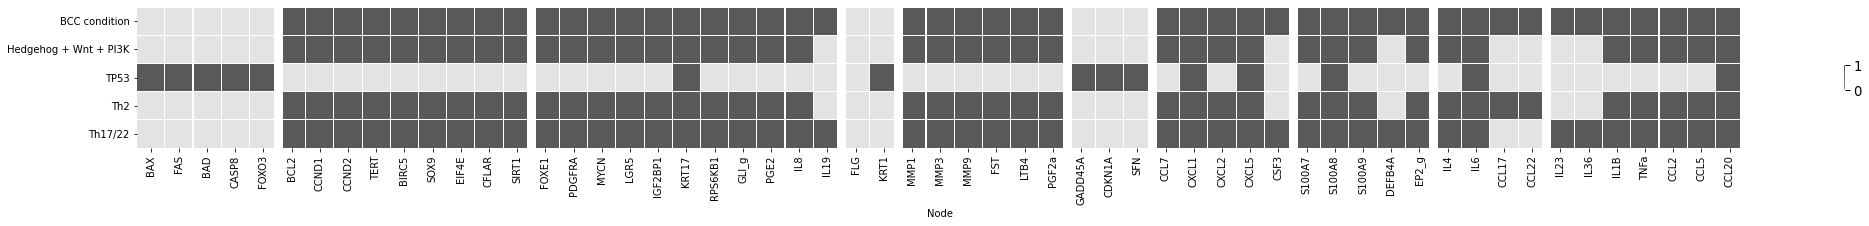

In [9]:
#Making heatmap
All_heatmap = [fpoints_inpBCC_df, fpoints_inpHh_Wnt_PI3K_df, fpoints_inpTP53_df, fpoints_inpTh2_df, fpoints_inpTh17_df]
all_heatmap_r = pd.concat(All_heatmap, keys=["BCC condition", "Hedgehog + Wnt + PI3K", "TP53", "Th2", "Th17/22"])
all_heatmap_r.index = all_heatmap_r.index.droplevel(1)
all_heatmap_r.columns = all_heatmap_r.columns.droplevel(0)

fig, ax = plt.subplots(figsize=(36, 46))
sns.set_context("paper", font_scale=1.5)

def NonLinCdict(steps, hexcol_array):
    cdict = {'red': (), 'green': (), 'blue': ()}
    for s, hexcol in zip(steps, hexcol_array):
        rgb = matplotlib.colors.hex2color(hexcol)
        cdict['red'] = cdict['red'] + ((s, rgb[0], rgb[0]),)
        cdict['green'] = cdict['green'] + ((s, rgb[1], rgb[1]),)
        cdict['blue'] = cdict['blue'] + ((s, rgb[2], rgb[2]),)
    return cdict

#fig, ax = plt.subplots(figsize=(36, 46))
sns.set_context("paper", font_scale=1.5)

hc = ['#e3e3e3', '#8a8a8a', '#79797a', '#616163', '#595959']
th = [0, 0.1, 0.5, 0.9, 1]

cdict = NonLinCdict(th, hc)
cm = LinearSegmentedColormap('test', cdict)

f = sns.heatmap(all_heatmap_r, cmap = cm, square = True, linewidth=0.1, cbar_kws={"shrink": .01})

ax.axvline(5, 0, 5, linewidth=9, c='white')
ax.axvline(14, 0, 5, linewidth=9, c='white')
ax.axvline(25, 0, 5, linewidth=9, c='white')
ax.axvline(27, 0, 5, linewidth=9, c='white')
ax.axvline(33, 0, 5, linewidth=9, c='white')
ax.axvline(36, 0, 5, linewidth=9, c='white')
ax.axvline(41, 0, 5, linewidth=9, c='white')
ax.axvline(46, 0, 5, linewidth=9, c='white')
ax.axvline(50, 0, 5, linewidth=9, c='white')
ax.axvline(57, 0, 5, linewidth=9, c='white')
f.figure.savefig('heatmap_validation_REAL.pdf', dpi = 300)


## 3 Drug perturbations 

Drug perturbations on inpBCC, the following drugs and their aims:

VDR ON (Calcitriol); GLI KO (Vismodegib and Sonidegib); SOCS3 ON (SOCS3 mimetics); PRKACA ON, TP53 ON, IL6R and IL4R OFF (Imiquimod); EP2 KO, cPLA2a KO (AVX001)

In [10]:
#VDR ON; Calcitriol
Calcitriol = biolqm.perturbation(blqm_mod, "GNAS%0 PTCH1%0 FZD%1 TNFRSF1A%1 IL22R%1 IL17R%1 EP2%1 VDR%1 TP53%0 DNAdam%1 IL6R%1 IL4R%1")

#GLI KO; Vismodegib and Sonidegib
Vismodegib_Sonidegib = biolqm.perturbation(blqm_mod, "GNAS%0 PTCH1%0 FZD%1 GLI_f%0 TNFRSF1A%1 IL22R%1 IL17R%1 EP2%1 VDR%0 TP53%0 DNAdam%1 IL6R%1 IL4R%1")
GANT61 = biolqm.perturbation(blqm_mod, "GNAS%0 PTCH1%0 FZD%1 GLI_f%0 TNFRSF1A%1 IL22R%1 IL17R%1 EP2%1 VDR%0 TP53%0 DNAdam%1 IL6R%1 IL4R%1")

#SOCS3 ON; SOCS3 mimetics
SOCS3_mimetics = biolqm.perturbation(blqm_mod, "GNAS%0 PTCH1%0 FZD%1 TNFRSF1A%1 IL22R%1 IL17R%1 EP2%1 VDR%0 TP53%0 DNAdam%1 IL6R%1 IL4R%1 SOCS3%1")

#PRKACA ON, TP53 ON, IL6R and IL4R OFF; Imiquimod 
Imiquimod = biolqm.perturbation(blqm_mod, "GNAS%0 PTCH1%0 FZD%1 TNFRSF1A%1 IL22R%1 IL17R%1 EP2%1 VDR%0 TP53%1 DNAdam%1 IL6R%0 IL4R%0 PRKACA%1")

#EP2 KO, cPLA2a KO; AVX001
EP_KO = biolqm.perturbation(blqm_mod, "GNAS%0 PTCH1%0 FZD%1 TNFRSF1A%1 IL22R%1 IL17R%1 EP2%0 VDR%0 TP53%0 DNAdam%1 IL6R%1 IL4R%1 cPLA2a%0")


In [11]:
#Computing stable states
#VDR is ON, calcitriol
fpoints_Calcitriol = biolqm.fixpoints(Calcitriol)
fpoints_Calcitriol_df = pd.DataFrame(fpoints_Calcitriol)
fpoints_Calcitriol_df = fpoints_Calcitriol_df[marker_nodes]
fpoints_Calcitriol_df.columns = pd.MultiIndex.from_arrays(phenotype, names=['Phenotype', 'Node'])

#SMO/GLI KO, Vismodegib or Sonidegib
fpoints_Vismodegib_Sonidegib = biolqm.fixpoints(Vismodegib_Sonidegib)
fpoints_Vismodegib_Sonidegib_df = pd.DataFrame(fpoints_Vismodegib_Sonidegib)
fpoints_Vismodegib_Sonidegib_df = fpoints_Vismodegib_Sonidegib_df[marker_nodes]
fpoints_Vismodegib_Sonidegib_df.columns = pd.MultiIndex.from_arrays(phenotype, names=['Phenotype', 'Node'])

#PRKACA ON, TP53 ON, IL6R and IL4R OFF, Imiquimod
fpoints_Imiquimod = biolqm.fixpoints(Imiquimod)
fpoints_Imiquimod_df = pd.DataFrame(fpoints_Imiquimod)
fpoints_Imiquimod_df = fpoints_Imiquimod_df[marker_nodes]
fpoints_Imiquimod_df.columns = pd.MultiIndex.from_arrays(phenotype, names=['Phenotype', 'Node'])

#GLI KO, GANT61
fpoints_GANT61 = biolqm.fixpoints(GANT61)
fpoints_GANT61_df = pd.DataFrame(fpoints_GANT61)
fpoints_GANT61_df = fpoints_GANT61_df[marker_nodes]
fpoints_GANT61_df.columns = pd.MultiIndex.from_arrays(phenotype, names=['Phenotype', 'Node'])

#SOCS3 ON, SOCS3 mimetics
fpoints_SOCS3_mimetics = biolqm.fixpoints(SOCS3_mimetics)
fpoints_SOCS3_mimetics_df = pd.DataFrame(fpoints_SOCS3_mimetics)
fpoints_SOCS3_mimetics_df = fpoints_SOCS3_mimetics_df[marker_nodes]
fpoints_SOCS3_mimetics_df.columns = pd.MultiIndex.from_arrays(phenotype, names=['Phenotype', 'Node'])

#EP2 KO, cPLA2a KO
fpoints_EP_KO = biolqm.fixpoints(EP_KO)
fpoints_EP_KO_df = pd.DataFrame(fpoints_EP_KO)
fpoints_EP_KO_df = fpoints_EP_KO_df[marker_nodes]
fpoints_EP_KO_df.columns = pd.MultiIndex.from_arrays(phenotype, names=['Phenotype', 'Node'])


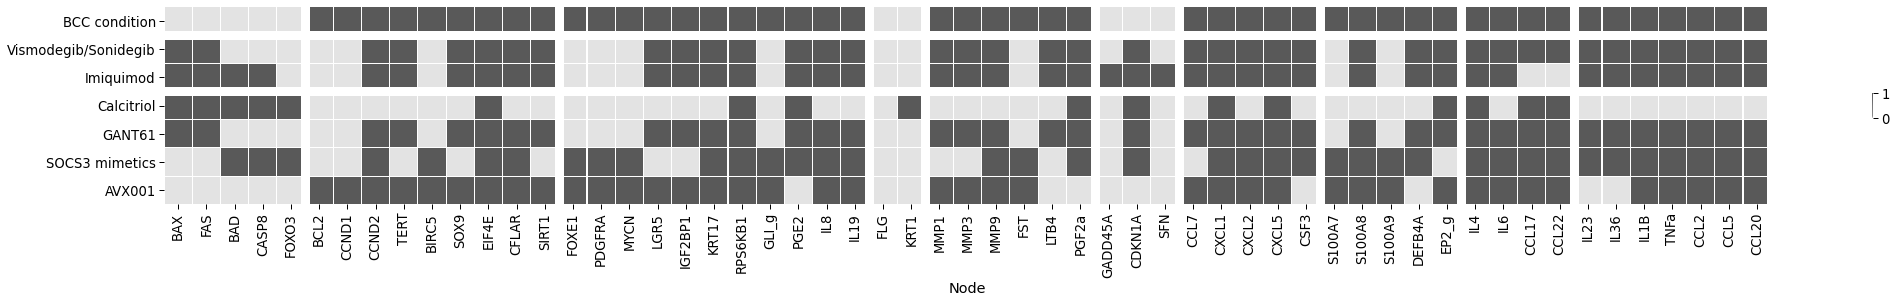

In [12]:
#Making heatmap for cancer markers
Drug_heatmap = [fpoints_inpBCC_df, fpoints_Vismodegib_Sonidegib_df, fpoints_Imiquimod_df,fpoints_Calcitriol_df, fpoints_GANT61_df, fpoints_SOCS3_mimetics_df, fpoints_EP_KO_df]
Drug_heatmap_r = pd.concat(Drug_heatmap, keys=["BCC condition", "Vismodegib/Sonidegib", "Imiquimod", "Calcitriol", "GANT61", "SOCS3 mimetics", "AVX001"])
Drug_heatmap_r.index = Drug_heatmap_r.index.droplevel(1)
Drug_heatmap_r.columns = Drug_heatmap_r.columns.droplevel(0)

fig, ax = plt.subplots(figsize=(36, 46))
sns.set_context("paper", font_scale=1.5)

def NonLinCdict(steps, hexcol_array):
    cdict = {'red': (), 'green': (), 'blue': ()}
    for s, hexcol in zip(steps, hexcol_array):
        rgb = matplotlib.colors.hex2color(hexcol)
        cdict['red'] = cdict['red'] + ((s, rgb[0], rgb[0]),)
        cdict['green'] = cdict['green'] + ((s, rgb[1], rgb[1]),)
        cdict['blue'] = cdict['blue'] + ((s, rgb[2], rgb[2]),)
    return cdict

#fig, ax = plt.subplots(figsize=(36, 46))
sns.set_context("paper", font_scale=1.5)

hc = ['#e3e3e3', '#8a8a8a', '#79797a', '#616163', '#595959']
th = [0, 0.1, 0.5, 0.9, 1]

cdict = NonLinCdict(th, hc)
cm = LinearSegmentedColormap('test', cdict)

f = sns.heatmap(Drug_heatmap_r, cmap = cm, square = True, linewidth=0.1, cbar_kws={"shrink": .01})

ax.axvline(5, 0, 5, linewidth=9, c='white')
ax.axvline(14, 0, 5, linewidth=9, c='white')
ax.axvline(25, 0, 5, linewidth=9, c='white')
ax.axvline(27, 0, 5, linewidth=9, c='white')
ax.axvline(33, 0, 5, linewidth=9, c='white')
ax.axvline(36, 0, 5, linewidth=9, c='white')
ax.axvline(41, 0, 5, linewidth=9, c='white')
ax.axvline(46, 0, 5, linewidth=9, c='white')
ax.axvline(50, 0, 5, linewidth=9, c='white')
ax.axvline(57, 0, 5, linewidth=9, c='white')
ax.axhline(1, 0, 5, linewidth=9, c='white')
ax.axhline(3, 0, 5, linewidth=9, c='white')
f.figure.savefig('drug_simulations_single_REAL.pdf', dpi = 300)

## 4 PINT analysis 

Finding mutations

In [13]:
#Set the marker genes
pnt_marker_nodes = ['BAX=0', 'FAS=0', 'BAD=0', 'CASP8=0', 'FOXO3=0', 'BCL2=1', 'CCND1=1',  'CCND2=1', 'TERT=1', 'BIRC5=1', 'SOX9=1', 'EIF4E=1', 'CFLAR=1', 'SIRT1=1', 'FOXE1=1', 'PDGFRA=1', 'MYCN=1', 'LGR5=1', 'IGF2BP1=1', 'KRT17=1', 'RPS6KB1=1', 'GLI_g=1', 'PGE2=1', 'IL8=1', 'IL19=1', 'FLG=0', 'KRT1=0', 'MMP1=1', 'MMP3=1', 'MMP9=1', 'FST=1', 'LTB4=1', 'PGF2a=1', 'GADD45A=0', 'CDKN1A=0', 'SFN=0', 'CCL7=1', 'CXCL1=1', 'CXCL2=1', 'CXCL5=1', 'CSF3=1', 'S100A7=1', 'S100A8=1', 'S100A9=1', 'DEFB4A=1', 'EP2_g=1', 'IL4=1', 'IL6=1', 'CCL17=1', 'CCL22=1', 'IL23=1', 'IL36=1', 'IL1B=1', 'TNFa=1', 'CCL2=1', 'CCL5=1', 'CCL20=1']

In [14]:
%%capture
mut_pint = []
n = pnt_mod.having({"GNAS":0, "PTCH1":0, "FZD":1, "TNFRSF1A":1, "IL22R":1, "IL17R":1, "EP2":1, "VDR":0, "TP53":0, "DNAdam":1, "IL6R":1, "IL4R":1 })

for g in pnt_marker_nodes:
    mut = list(n.oneshot_mutations_for_cut(g, maxsize=2))
    mut_pint.extend(mut)

In [15]:
import collections   
        
counts = collections.Counter(tuple(sorted(x.items())) for x in mut_pint)

comb = pd.DataFrame(list(counts.items()),columns = ['Perturbation', 'Frequency'])
comb.sort_values(by=['Frequency'], ascending= False)

Perturbation  Frequency
2                    ((VDR, 1),)         15
5                  ((GSK3B, 1),)         14
0                 ((PRKACA, 1),)         10
3                   ((SUFU, 1),)         10
4                  ((GLI_f, 0),)         10
6                ((CSNK1A1, 1),)         10
24                 ((SOCS3, 1),)          9
37        ((IKBKB, 0), (VDR, 1))          6
49         ((NFKB, 0), (VDR, 1))          6
55          ((EP2, 0), (VDR, 1))          6
43       ((NFKBIA, 1), (VDR, 1))          6
101                 ((NFKB, 0),)          4
23                   ((AKT, 0),)          4
100               ((NFKBIA, 1),)          4
25      ((PDPK1, 0), (SOCS1, 0))          4
102                  ((EP2, 0),)          4
26     ((PIK3CA, 0), (SOCS1, 0))          4
89                 ((STAT3, 0),)          4
99                 ((IKBKB, 0),)          4
77                ((cPLA2a, 0),)          3
52       ((GSK3B, 1), (NFKB, 0))          3
44      ((NFKBIA, 1), (SUFU, 1))          3
45     ((GLI_f, 0), (NFKBIA, 1))          3
46     ((GSK3B, 1), (NFKBIA, 1))          3
113      ((NFKB, 0), (STAT1, 0))          3
47   ((CSNK1A1, 1), (NFKBIA, 1))          3
48      ((NFKB, 0), (PRKACA, 1))          3
112    ((NFKBIA, 1), (STAT1, 0))          3
50        ((NFKB, 0), (SUFU, 1))          3
51       ((GLI_f, 0), (NFKB, 0))          3
54       ((EP2, 0), (PRKACA, 1))          3
53     ((CSNK1A1, 1), (NFKB, 0))          3
76                    ((AA, 0),)          3
111     ((IKBKB, 0), (STAT1, 0))          3
56         ((EP2, 0), (SUFU, 1))          3
88                 ((IL17R, 0),)          3
87                ((NFKBIZ, 0),)          3
58        ((EP2, 0), (GSK3B, 1))          3
42    ((NFKBIA, 1), (PRKACA, 1))          3
64                ((CTNNB1, 0),)          3
65               ((TCF_LEF, 0),)          3
59      ((CSNK1A1, 1), (EP2, 0))          3
57        ((EP2, 0), (GLI_f, 0))          3
41    ((CSNK1A1, 1), (IKBKB, 0))          3
36     ((IKBKB, 0), (PRKACA, 1))          3
40      ((GSK3B, 1), (IKBKB, 0))          3
114       ((EP2, 0), (STAT1, 0))          3
38       ((IKBKB, 0), (SUFU, 1))          3
39      ((GLI_f, 0), (IKBKB, 0))          3
62       ((CTNNB1, 0), (JNK, 0))          2
7                   ((TP53, 1),)          2
110                ((STAT6, 0),)          2
109                 ((IL4R, 0),)          2
92                   ((SP1, 0),)          2
90                ((ERK1_2, 0),)          2
15        ((SOCS3, 1), (VDR, 1))          2
86        ((EP2, 0), (SOCS3, 1))          2
84        ((CREB1, 0), (EP2, 0))          2
82          ((AKT, 0), (EP2, 0))          2
80     ((CREB1, 0), (NFKBIA, 1))          2
78                  ((COX2, 0),)          2
63      ((JNK, 0), (TCF_LEF, 0))          2
81       ((CREB1, 0), (NFKB, 0))          2
61          ((AKT, 0), (JNK, 0))          2
60                   ((MYC, 0),)          2
79      ((CREB1, 0), (IKBKB, 0))          2
66          ((JNK, 0), (VDR, 1))          1
91                 ((ALOX5, 0),)          1
93      ((IL17R, 0), (STAT3, 0))          1
94        ((IL17R, 0), (VDR, 1))          1
95       ((CEBP, 0), (STAT3, 0))          1
96         ((CEBP, 0), (VDR, 1))          1
97   ((STAT3, 0), (TRAF3IP2, 0))          1
98     ((TRAF3IP2, 0), (VDR, 1))          1
13     ((PRKACA, 1), (SOCS3, 1))          1
12                 ((FOXO3, 1),)          1
11        ((EP2, 0), (STAT3, 0))          1
10       ((NFKB, 0), (STAT3, 0))          1
103                  ((AP1, 0),)          1
104       ((P38, 0), (SOCS3, 1))          1
105    ((ERK1_2, 0), (STAT3, 1))          1
106     ((SOCS3, 1), (STAT3, 1))          1
107       ((SP1, 0), (STAT3, 1))          1
108       ((STAT3, 1), (VDR, 1))          1
32      ((TCF_LEF, 0), (VDR, 1))          1
33                   ((P38, 0),)          1
9      ((NFKBIA, 1), (STAT3, 0))          1
8       ((IKBKB, 0), (STAT3, 0))          1
34                  ((MNK1, 0),)          1
31       ((CTNNB1, 0), (VDR, 1))          1
30          ((AK

## 5 Double mutants

Codes in section 5 and the belonging subsection are taken from the supplementary tutorial in the article "The CoLoMoTo Interactive Notebook: Accessible and Reproducible Computational Analyses for Qualitative Biological Networks":

The article with notebook:
Naldi A, Hernandez C, Levy N, Stoll G, Monteiro PT, Chaouiya C, Helikar T, Zinovyev A, Calzone L, Cohen-Boulakia S, Thieffry D. The CoLoMoTo interactive notebook: accessible and reproducible computational analyses for qualitative biological networks. Frontiers in physiology. 2018 Jun 19;9:680.

The Notebook tutorial used:
https://nbviewer.org/github/colomoto/colomoto-docker/blob/2018-03-31/tutorials/MaBoSS/Predict%20mutations%20with%20Pint%2C%20refine%20with%20MaBoSS.ipynb

In [16]:
#Pint: double-mutants
mut_combo = [combinations(n.items(), 2) for n in mut_pint if len(n) >= 2]
res_cand = reduce(set.union, mut_combo, set())
res_cand

{(('AKT', 0), ('EP2', 0)),
 (('AKT', 0), ('VDR', 1)),
 (('CEBP', 0), ('STAT3', 0)),
 (('CEBP', 0), ('VDR', 1)),
 (('CREB1', 0), ('EP2', 0)),
 (('CREB1', 0), ('STAT3', 0)),
 (('CREB1', 0), ('VDR', 1)),
 (('CSNK1A1', 1), ('MYC', 0)),
 (('EP2', 0), ('CSNK1A1', 1)),
 (('EP2', 0), ('GLI_f', 0)),
 (('EP2', 0), ('GSK3B', 1)),
 (('EP2', 0), ('SUFU', 1)),
 (('EP2', 0), ('VDR', 1)),
 (('ERK1_2', 0), ('AKT', 0)),
 (('ERK1_2', 0), ('CTNNB1', 0)),
 (('ERK1_2', 0), ('STAT3', 1)),
 (('ERK1_2', 0), ('TCF_LEF', 0)),
 (('GLI_f', 0), ('MYC', 0)),
 (('IKBKB', 0), ('CREB1', 0)),
 (('IKBKB', 0), ('CSNK1A1', 1)),
 (('IKBKB', 0), ('GLI_f', 0)),
 (('IKBKB', 0), ('GSK3B', 1)),
 (('IKBKB', 0), ('PRKACA', 1)),
 (('IKBKB', 0), ('STAT1', 0)),
 (('IKBKB', 0), ('STAT3', 0)),
 (('IKBKB', 0), ('SUFU', 1)),
 (('IKBKB', 0), ('VDR', 1)),
 (('IL17R', 0), ('STAT3', 0)),
 (('IL17R', 0), ('VDR', 1)),
 (('IL22R', 0), ('VDR', 1)),
 (('JNK', 0), ('AKT', 0)),
 (('JNK', 0), ('CTNNB1', 0)),
 (('JNK', 0), ('TCF_LEF', 0)),
 (('JNK', 

In [17]:
res_cand_set1 = {(('AKT', 0), ('EP2', 0)),
 (('AKT', 0), ('VDR', 1)),
 (('CEBP', 0), ('STAT3', 0)),
 (('CEBP', 0), ('VDR', 1)),
 (('CREB1', 0), ('EP2', 0)),
 (('CREB1', 0), ('STAT3', 0)),
 (('CREB1', 0), ('VDR', 1))}

In [18]:
res_cand_set2 = {(('EP2', 0), ('CSNK1A1', 1)),
 (('EP2', 0), ('GLI_f', 0)),
 (('EP2', 0), ('GSK3B', 1)),
 (('EP2', 0), ('SUFU', 1)),
 (('EP2', 0), ('VDR', 1)),
 (('ERK1_2', 0), ('AKT', 0)),
 (('ERK1_2', 0), ('CTNNB1', 0)),
 (('ERK1_2', 0), ('STAT3', 1))}

In [19]:
res_cand_set3 = {(('ERK1_2', 0), ('TCF_LEF', 0)),
 (('GLI_f', 0), ('MYC', 0)),
 (('IKBKB', 0), ('CREB1', 0)),
 (('IKBKB', 0), ('CSNK1A1', 1)),
 (('IKBKB', 0), ('GLI_f', 0)),
 (('IKBKB', 0), ('GSK3B', 1)),
 (('IKBKB', 0), ('PRKACA', 1)),
 (('IKBKB', 0), ('STAT1', 0))}

In [20]:
res_cand_set4 = {(('IKBKB', 0), ('SUFU', 1)),
 (('IKBKB', 0), ('VDR', 1)),
 (('IL17R', 0), ('STAT3', 0)),
 (('IL17R', 0), ('VDR', 1)),
 (('IL22R', 0), ('VDR', 1)),
 (('JNK', 0), ('AKT', 0)),
 (('JNK', 0), ('CTNNB1', 0)),
 (('JNK', 0), ('TCF_LEF', 0))}

In [21]:
res_cand_set5 = {(('JNK', 0), ('VDR', 1)),
 (('NFKB', 0), ('CREB1', 0)),
 (('NFKB', 0), ('CSNK1A1', 1)),
 (('NFKB', 0), ('GLI_f', 0)),
 (('NFKB', 0), ('GSK3B', 1)),
 (('NFKB', 0), ('PRKACA', 1)),
 (('NFKB', 0), ('STAT1', 0)),
 (('NFKB', 0), ('STAT3', 0))}

In [22]:
res_cand_set6 = {(('NFKB', 0), ('SUFU', 1)),
 (('NFKB', 0), ('VDR', 1)),
 (('NFKBIA', 1), ('CREB1', 0)),
 (('NFKBIA', 1), ('CSNK1A1', 1)),
 (('NFKBIA', 1), ('GLI_f', 0)),
 (('NFKBIA', 1), ('GSK3B', 1)),
 (('NFKBIA', 1), ('PRKACA', 1)),
 (('NFKBIA', 1), ('STAT1', 0))}

In [23]:
res_cand_set7 = {(('NFKBIA', 1), ('STAT3', 0)),
 (('NFKBIA', 1), ('SUFU', 1)),
 (('NFKBIA', 1), ('VDR', 1)),
 (('P38', 0), ('SOCS3', 1)),
 (('PDPK1', 0), ('SOCS1', 0)),
 (('PIK3R1', 0), ('VDR', 1)),
 (('PRKACA', 1), ('EP2', 0)),
 (('PRKACA', 1), ('MYC', 0)),}

In [24]:
res_cand_set8 = {(('PRKACA', 1), ('SOCS3', 1)),
 (('SOCS1', 0), ('PIK3CA', 0)),
 (('SOCS3', 1), ('CSNK1A1', 1)),
 (('SOCS3', 1), ('EP2', 0)),
 (('SOCS3', 1), ('GLI_f', 0)),
 (('SOCS3', 1), ('SUFU', 1)),
 (('SOCS3', 1), ('VDR', 1)),
 (('STAT1', 0), ('EP2', 0))}

In [25]:
res_cand_set9 = {(('STAT3', 0), ('EP2', 0)),
 (('STAT3', 0), ('TRAF3IP2', 0)),
 (('STAT3', 1), ('SOCS3', 1)),
 (('STAT3', 1), ('SP1', 0)),
 (('STAT3', 1), ('VDR', 1)),
 (('SUFU', 1), ('MYC', 0))}

In [26]:
res_cand_set10 = {(('TRAF3IP2', 0), ('VDR', 1)),
 (('VDR', 1), ('CTNNB1', 0)),
 (('VDR', 1), ('GSK3B', 1)),
 (('VDR', 1), ('JUN', 0)),
 (('VDR', 1), ('MYC', 0)),
 (('VDR', 1), ('TCF_LEF', 0)),
 (('CSNK1A1', 1), ('MYC', 0))}

### 5.1 Simulations in MaBoSS for double-mutants

In [27]:
#Examples of simulations to visualize impact, used res_cand_set1-10 defined above. 

In [28]:
import matplotlib.pyplot as plt

In [29]:
#initial state
mbs_dbl_mut = ginsim.to_maboss(gsim_mod)
mbs_dbl_mut.network.set_istate("FZD", [0, 1]) #FZD is active
mbs_dbl_mut.network.set_istate("TNFRSF1A", [0, 1]) #TNFRSF1A is active
mbs_dbl_mut.network.set_istate("IL22R", [0, 1]) #IL22R is active
mbs_dbl_mut.network.set_istate("IL17R", [0, 1]) #IL17R is active
mbs_dbl_mut.network.set_istate("EP2", [0, 1]) #EP2 is active
mbs_dbl_mut.network.set_istate("DNAdam", [0, 1]) #DNAdam is active
mbs_dbl_mut.network.set_istate("IL6R", [0, 1]) #IL6R is active
mbs_dbl_mut.network.set_istate("IL4R", [0, 1]) #IL4R is active

#Set BCC mutations
mbs_dbl_mut.mutate("GNAS", "OFF")
mbs_dbl_mut.mutate("PTCH1", "OFF")
mbs_dbl_mut.mutate("VDR", "OFF")
mbs_dbl_mut.mutate("TP53", "OFF")

#Set output
mbs_dbl_mut.network.set_output(('BAX', 'FAS', 'BAD', 'CASP8', 'FOXO3', 'BCL2', 'CCND1',  'CCND2', 'TERT', 'BIRC5', 'SOX9', 'EIF4E', 'CFLAR', 'SIRT1', 'FOXE1', 'PDGFRA', 'MYCN', 'LGR5', 'IGF2BP1', 'KRT17', 'RPS6KB1', 'GLI_g', 'PGE2', 'IL8', 'IL19', 'FLG', 'KRT1', 'MMP1', 'MMP3', 'MMP9', 'FST', 'LTB4', 'PGF2a', 'GADD45A', 'CDKN1A', 'SFN'))

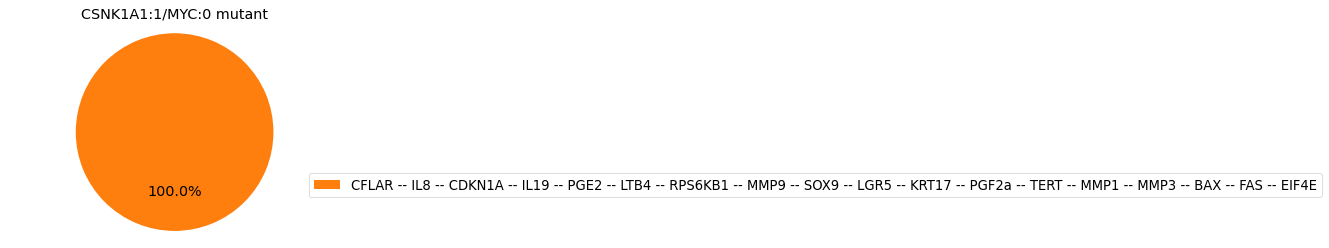

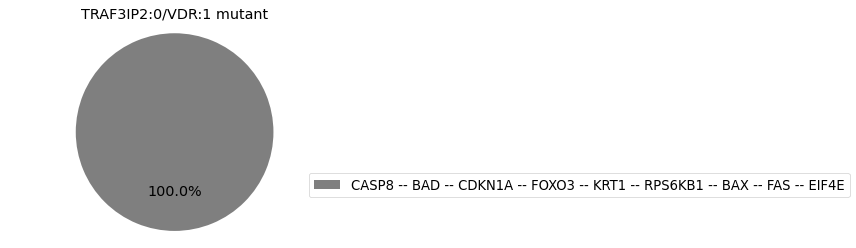

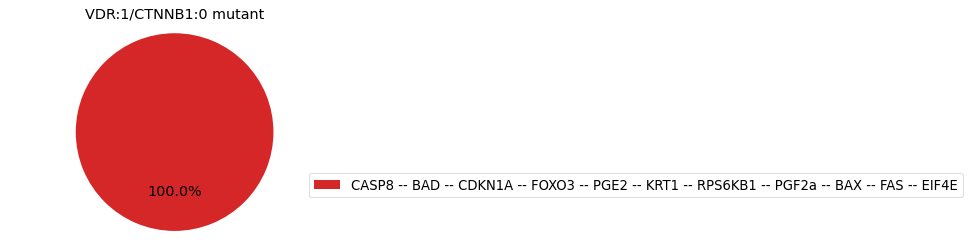

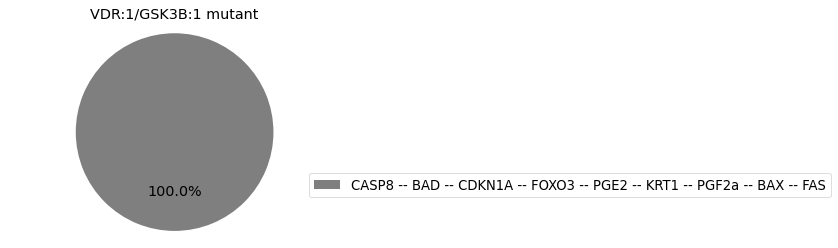

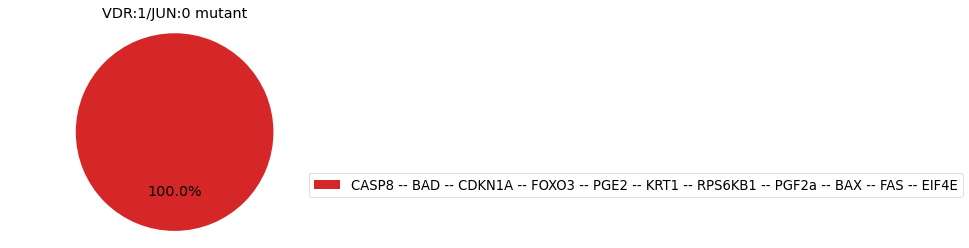

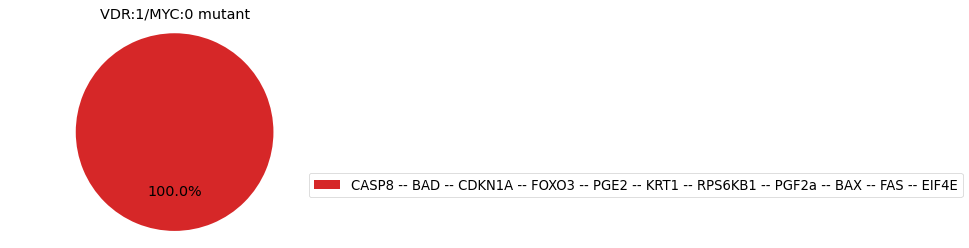

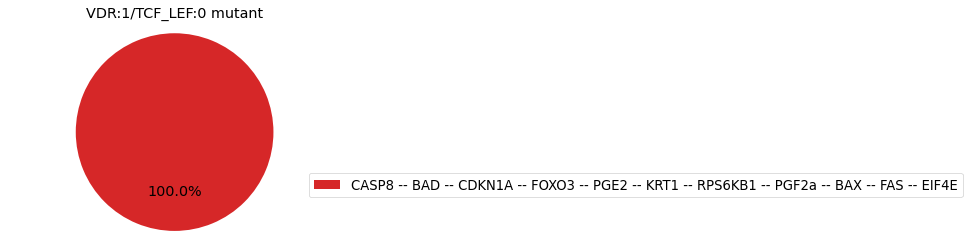

In [40]:
for mut_pint in sorted(res_cand_set10):
    BCC_mut = mbs_dbl_mut.copy()
    for (node, value) in mut_pint:
        BCC_mut.mutate(node, "ON" if value else "OFF")
    res_BCC_mut = BCC_mut.run()
    res_BCC_mut.plot_piechart(embed_labels=False, autopct=4)
    mut_n = "/".join(["%s:%s"%n for n in mut_pint])
    plt.title("%s mutant" % mut_n)

## 6 Testing double-mutations 

The codes that follows (section 6-8) are again taken from: 

Tsirvouli E, Ashcroft F, Johansen B, Kuiper M. Logical and experimental modeling of cytokine and eicosanoid signaling in psoriatic keratinocytes. Iscience. 2021 Dec 17;24(12):103451.

The notebook used: 
Tsirvouli, E., and Kuiper, M. (2021). Psoriatic Keratinocyte (psoKC) Logical Model (Zenodo). https://doi.org/10.5281/zenodo.5549353. 

In [30]:
#Checking additativ effect for chosen combos:

### 6.1 VDR combinations:

In [31]:
#VDR ON
VDR_1 = biolqm.perturbation(blqm_mod, "GNAS%0 PTCH1%0 FZD%1 TNFRSF1A%1 IL22R%1 IL17R%1 EP2%1 VDR%1 TP53%0 DNAdam%1 IL6R%1 IL4R%1")

#IL17R OFF, VDR ON
IL17R_0_VDR_1 = biolqm.perturbation(blqm_mod, "GNAS%0 PTCH1%0 FZD%1 TNFRSF1A%1 IL22R%1 IL17R%0 EP2%1 VDR%1 TP53%0 DNAdam%1 IL6R%1 IL4R%1")

#IL22R OFF, VDR ON
IL22R_0_VDR_1 = biolqm.perturbation(blqm_mod, "GNAS%0 PTCH1%0 FZD%1 TNFRSF1A%1 IL22R%0 IL17R%1 EP2%1 VDR%1 TP53%0 DNAdam%1 IL6R%1 IL4R%1")


In [32]:
#stable states
#VDR is knocked on
fpoints_VDR_1_mut = biolqm.fixpoints(VDR_1)
fpoints_VDR_1_mut_df = pd.DataFrame(fpoints_VDR_1_mut)
fpoints_VDR_1_mut_df = fpoints_VDR_1_mut_df[marker_nodes]
fpoints_VDR_1_mut_df.columns = pd.MultiIndex.from_arrays(phenotype, names=['Phenotype', 'Node'])

#VDR is knocked on, IL17R off
fpoints_IL17R_0_VDR_1_mut = biolqm.fixpoints(IL17R_0_VDR_1)
fpoints_IL17R_0_VDR_1_mut_df = pd.DataFrame(fpoints_IL17R_0_VDR_1_mut)
fpoints_IL17R_0_VDR_1_mut_df = fpoints_IL17R_0_VDR_1_mut_df[marker_nodes]
fpoints_IL17R_0_VDR_1_mut_df.columns = pd.MultiIndex.from_arrays(phenotype, names=['Phenotype', 'Node'])

#VDR is knocked on, IL22R off
fpoints_IL22R_0_VDR_1_mut = biolqm.fixpoints(IL22R_0_VDR_1)
fpoints_IL22R_0_VDR_1_mut_df = pd.DataFrame(fpoints_IL22R_0_VDR_1_mut)
fpoints_IL22R_0_VDR_1_mut_df = fpoints_IL22R_0_VDR_1_mut_df[marker_nodes]
fpoints_IL22R_0_VDR_1_mut_df.columns = pd.MultiIndex.from_arrays(phenotype, names=['Phenotype', 'Node'])


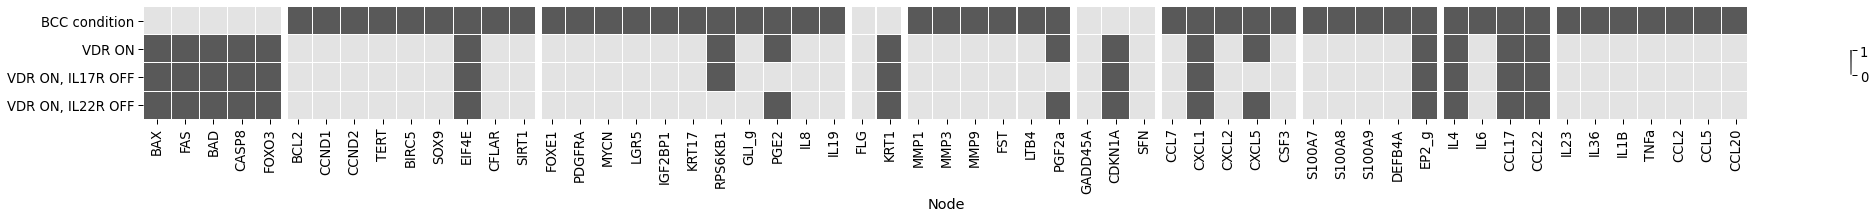

In [33]:
#Making heatmap
Mut_heatmap = [fpoints_inpBCC_df, fpoints_VDR_1_mut_df, fpoints_IL17R_0_VDR_1_mut_df, fpoints_IL22R_0_VDR_1_mut_df]
Mut_heatmap_r = pd.concat(Mut_heatmap, keys=["BCC condition", "VDR ON", "VDR ON, IL17R OFF", "VDR ON, IL22R OFF"])
Mut_heatmap_r.index = Mut_heatmap_r.index.droplevel(1)
Mut_heatmap_r.columns = Mut_heatmap_r.columns.droplevel(0)

fig, ax = plt.subplots(figsize=(36, 46))
sns.set_context("paper", font_scale=1.5)

def NonLinCdict(steps, hexcol_array):
    cdict = {'red': (), 'green': (), 'blue': ()}
    for s, hexcol in zip(steps, hexcol_array):
        rgb = matplotlib.colors.hex2color(hexcol)
        cdict['red'] = cdict['red'] + ((s, rgb[0], rgb[0]),)
        cdict['green'] = cdict['green'] + ((s, rgb[1], rgb[1]),)
        cdict['blue'] = cdict['blue'] + ((s, rgb[2], rgb[2]),)
    return cdict

#fig, ax = plt.subplots(figsize=(36, 46))
sns.set_context("paper", font_scale=1.5)

hc = ['#e3e3e3', '#8a8a8a', '#79797a', '#616163', '#595959']
th = [0, 0.1, 0.5, 0.9, 1]

cdict = NonLinCdict(th, hc)
cm = LinearSegmentedColormap('test', cdict)

f = sns.heatmap(Mut_heatmap_r, cmap = cm, square = True, linewidth=0.1, cbar_kws={"shrink": .01})

ax.axvline(5, 0, 5, linewidth=7, c='white')
ax.axvline(14, 0, 5, linewidth=7, c='white')
ax.axvline(25, 0, 5, linewidth=7, c='white')
ax.axvline(27, 0, 5, linewidth=7, c='white')
ax.axvline(33, 0, 5, linewidth=7, c='white')
ax.axvline(36, 0, 5, linewidth=7, c='white')
ax.axvline(41, 0, 5, linewidth=7, c='white')
ax.axvline(46, 0, 5, linewidth=7, c='white')
ax.axvline(50, 0, 5, linewidth=7, c='white')
ax.axvline(57, 0, 5, linewidth=7, c='white')
f.figure.savefig('drug_simulations.pdf', dpi = 300)

### 6.2 GSK3B combinations

In [34]:
#GSK3B ON
GSK3B_1 = biolqm.perturbation(blqm_mod, "GNAS%0 PTCH1%0 FZD%1 TNFRSF1A%1 IL22R%1 IL17R%1 EP2%1 VDR%0 TP53%0 DNAdam%1 IL6R%1 IL4R%1 GSK3B%1")

#NFKB OFF, GSK3B ON
NFKB_0_GSK3B_1 = biolqm.perturbation(blqm_mod, "GNAS%0 PTCH1%0 FZD%1 TNFRSF1A%1 IL22R%1 IL17R%1 EP2%1 VDR%0 TP53%0 DNAdam%1 IL6R%1 IL4R%1 NFKB%0 GSK3B%1")

#NFKBIA ON, GSK3B ON
NFKBIA_1_GSK3B_1 = biolqm.perturbation(blqm_mod, "GNAS%0 PTCH1%0 FZD%1 TNFRSF1A%1 IL22R%1 IL17R%1 EP2%1 VDR%0 TP53%0 DNAdam%1 IL6R%1 IL4R%1 NFKBIA%1 GSK3B%1")

#IKBKB OFF, GSK3B ON
IKBKB_0_GSK3B_1 = biolqm.perturbation(blqm_mod, "GNAS%0 PTCH1%0 FZD%1 TNFRSF1A%1 IL22R%1 IL17R%1 EP2%1 VDR%0 TP53%0 DNAdam%1 IL6R%1 IL4R%1 IKBKB%0 GSK3B%1")

#EP2 OFF, GSK3B ON
EP2_0_GSK3B_1 = biolqm.perturbation(blqm_mod, "GNAS%0 PTCH1%0 FZD%1 TNFRSF1A%1 IL22R%1 IL17R%1 EP2%0 VDR%0 TP53%0 DNAdam%1 IL6R%1 IL4R%1 GSK3B%1")


In [35]:
#stable states
#GSK3B is knocked on
fpoints_GSK3B_1_mut = biolqm.fixpoints(GSK3B_1)
fpoints_GSK3B_1_mut_df = pd.DataFrame(fpoints_GSK3B_1_mut)
fpoints_GSK3B_1_mut_df = fpoints_GSK3B_1_mut_df[marker_nodes]
fpoints_GSK3B_1_mut_df.columns = pd.MultiIndex.from_arrays(phenotype, names=['Phenotype', 'Node'])

#GSK3B is knocked on, NFKB off
fpoints_NFKB_0_GSK3B_1_mut = biolqm.fixpoints(NFKB_0_GSK3B_1)
fpoints_NFKB_0_GSK3B_1_mut_df = pd.DataFrame(fpoints_NFKB_0_GSK3B_1_mut)
fpoints_NFKB_0_GSK3B_1_mut_df = fpoints_NFKB_0_GSK3B_1_mut_df[marker_nodes]
fpoints_NFKB_0_GSK3B_1_mut_df.columns = pd.MultiIndex.from_arrays(phenotype, names=['Phenotype', 'Node'])

#GSK3B is knocked on, NFKBIA on
fpoints_NFKBIA_1_GSK3B_1_mut = biolqm.fixpoints(NFKBIA_1_GSK3B_1)
fpoints_NFKBIA_1_GSK3B_1_mut_df = pd.DataFrame(fpoints_NFKBIA_1_GSK3B_1_mut)
fpoints_NFKBIA_1_GSK3B_1_mut_df = fpoints_NFKBIA_1_GSK3B_1_mut_df[marker_nodes]
fpoints_NFKBIA_1_GSK3B_1_mut_df.columns = pd.MultiIndex.from_arrays(phenotype, names=['Phenotype', 'Node'])

#GSK3B is knocked on, IKBKB off
fpoints_IKBKB_0_GSK3B_1_mut = biolqm.fixpoints(IKBKB_0_GSK3B_1)
fpoints_IKBKB_0_GSK3B_1_mut_df = pd.DataFrame(fpoints_IKBKB_0_GSK3B_1_mut)
fpoints_IKBKB_0_GSK3B_1_mut_df = fpoints_IKBKB_0_GSK3B_1_mut_df[marker_nodes]
fpoints_IKBKB_0_GSK3B_1_mut_df.columns = pd.MultiIndex.from_arrays(phenotype, names=['Phenotype', 'Node'])

#GSK3B is knocked on, EP2 off
fpoints_EP2_0_GSK3B_1_mut = biolqm.fixpoints(EP2_0_GSK3B_1)
fpoints_EP2_0_GSK3B_1_mut_df = pd.DataFrame(fpoints_EP2_0_GSK3B_1_mut)
fpoints_EP2_0_GSK3B_1_mut_df = fpoints_EP2_0_GSK3B_1_mut_df[marker_nodes]
fpoints_EP2_0_GSK3B_1_mut_df.columns = pd.MultiIndex.from_arrays(phenotype, names=['Phenotype', 'Node'])

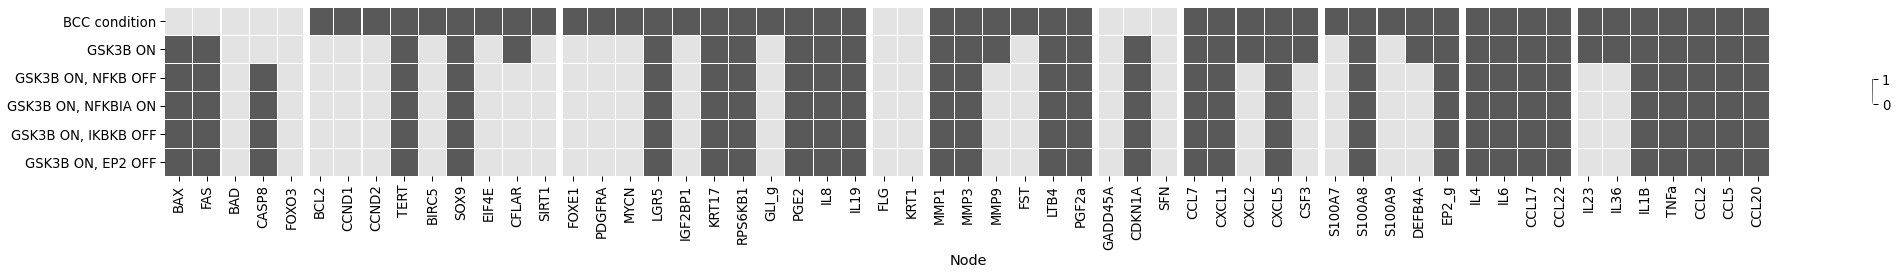

In [36]:
#Making heatmap
Mut_heatmap_GSK3B = [fpoints_inpBCC_df, fpoints_GSK3B_1_mut_df, fpoints_NFKB_0_GSK3B_1_mut_df, fpoints_NFKBIA_1_GSK3B_1_mut_df, fpoints_IKBKB_0_GSK3B_1_mut_df, fpoints_EP2_0_GSK3B_1_mut_df]
Mut_heatmap_GSK3B_r = pd.concat(Mut_heatmap_GSK3B, keys=["BCC condition", "GSK3B ON", "GSK3B ON, NFKB OFF", "GSK3B ON, NFKBIA ON", "GSK3B ON, IKBKB OFF", "GSK3B ON, EP2 OFF"])
Mut_heatmap_GSK3B_r.index = Mut_heatmap_GSK3B_r.index.droplevel(1)
Mut_heatmap_GSK3B_r.columns = Mut_heatmap_GSK3B_r.columns.droplevel(0)

fig, ax = plt.subplots(figsize=(36, 46))
sns.set_context("paper", font_scale=1.5)

def NonLinCdict(steps, hexcol_array):
    cdict = {'red': (), 'green': (), 'blue': ()}
    for s, hexcol in zip(steps, hexcol_array):
        rgb = matplotlib.colors.hex2color(hexcol)
        cdict['red'] = cdict['red'] + ((s, rgb[0], rgb[0]),)
        cdict['green'] = cdict['green'] + ((s, rgb[1], rgb[1]),)
        cdict['blue'] = cdict['blue'] + ((s, rgb[2], rgb[2]),)
    return cdict

#fig, ax = plt.subplots(figsize=(36, 46))
sns.set_context("paper", font_scale=1.5)

hc = ['#e3e3e3', '#8a8a8a', '#79797a', '#616163', '#595959']
th = [0, 0.1, 0.5, 0.9, 1]

cdict = NonLinCdict(th, hc)
cm = LinearSegmentedColormap('test', cdict)

f = sns.heatmap(Mut_heatmap_GSK3B_r, cmap = cm, square = True, linewidth=0.1, cbar_kws={"shrink": .01})

ax.axvline(5, 0, 5, linewidth=7, c='white')
ax.axvline(14, 0, 5, linewidth=7, c='white')
ax.axvline(25, 0, 5, linewidth=7, c='white')
ax.axvline(27, 0, 5, linewidth=7, c='white')
ax.axvline(33, 0, 5, linewidth=7, c='white')
ax.axvline(36, 0, 5, linewidth=7, c='white')
ax.axvline(41, 0, 5, linewidth=7, c='white')
ax.axvline(46, 0, 5, linewidth=7, c='white')
ax.axvline(50, 0, 5, linewidth=7, c='white')
ax.axvline(57, 0, 5, linewidth=7, c='white')
f.figure.savefig('drug_simulations.pdf', dpi = 300)

### 6.3 SOCS3 combinations

In [37]:
#SOCS3 ON
SOCS3_1 = biolqm.perturbation(blqm_mod, "GNAS%0 PTCH1%0 FZD%1 TNFRSF1A%1 IL22R%1 IL17R%1 EP2%1 VDR%0 TP53%0 DNAdam%1 IL6R%1 IL4R%1 SOCS3%1")

#PRKACA ON, SOCS3 ON
PRKACA_1_SOCS3_1 = biolqm.perturbation(blqm_mod, "GNAS%0 PTCH1%0 FZD%1 TNFRSF1A%1 IL22R%1 IL17R%1 EP2%1 VDR%0 TP53%0 DNAdam%1 IL6R%1 IL4R%1 PRKACA%1 SOCS3%1")

#SOCS3 ON, CSNK1A1 ON
SOCS3_1_CSNK1A1_1 = biolqm.perturbation(blqm_mod, "GNAS%0 PTCH1%0 FZD%1 TNFRSF1A%1 IL22R%1 IL17R%1 EP2%1 VDR%0 TP53%0 DNAdam%1 IL6R%1 IL4R%1 CSNK1A1%1 SOCS3%1")

#SOCS3 ON, GLI OFF
SOCS3_1_GLI_0 = biolqm.perturbation(blqm_mod, "GNAS%0 PTCH1%0 FZD%1 TNFRSF1A%1 IL22R%1 IL17R%1 EP2%1 VDR%0 TP53%0 DNAdam%1 IL6R%1 IL4R%1 GLI_f%0 SOCS3%1")

#SOCS3 ON, SUFU ON
SOCS3_1_SUFU_1 = biolqm.perturbation(blqm_mod, "GNAS%0 PTCH1%0 FZD%1 TNFRSF1A%1 IL22R%1 IL17R%1 EP2%1 VDR%0 TP53%0 DNAdam%1 IL6R%1 IL4R%1 SUFU%1 SOCS3%1")


In [38]:
#Computing stable states
#SOCS3 is knocked on
fpoints_SOCS3_1_mut = biolqm.fixpoints(SOCS3_1)
fpoints_SOCS3_1_mut_df = pd.DataFrame(fpoints_SOCS3_1_mut)
fpoints_SOCS3_1_mut_df = fpoints_SOCS3_1_mut_df[marker_nodes]
fpoints_SOCS3_1_mut_df.columns = pd.MultiIndex.from_arrays(phenotype, names=['Phenotype', 'Node'])

#SOCS3 is knocked on, PRKACA on
fpoints_PRKACA_1_SOCS3_1_mut = biolqm.fixpoints(PRKACA_1_SOCS3_1)
fpoints_PRKACA_1_SOCS3_1_mut_df = pd.DataFrame(fpoints_PRKACA_1_SOCS3_1_mut)
fpoints_PRKACA_1_SOCS3_1_mut_df = fpoints_PRKACA_1_SOCS3_1_mut_df[marker_nodes]
fpoints_PRKACA_1_SOCS3_1_mut_df.columns = pd.MultiIndex.from_arrays(phenotype, names=['Phenotype', 'Node'])

#SOCS3 is knocked on, CSNK1A1 on
fpoints_SOCS3_1_CSNK1A1_1_mut = biolqm.fixpoints(SOCS3_1_CSNK1A1_1)
fpoints_SOCS3_1_CSNK1A1_1_mut_df = pd.DataFrame(fpoints_SOCS3_1_CSNK1A1_1_mut)
fpoints_SOCS3_1_CSNK1A1_1_mut_df = fpoints_SOCS3_1_CSNK1A1_1_mut_df[marker_nodes]
fpoints_SOCS3_1_CSNK1A1_1_mut_df.columns = pd.MultiIndex.from_arrays(phenotype, names=['Phenotype', 'Node'])

#SOCS3 is knocked on, GLI off
fpoints_SOCS3_1_GLI_0_mut = biolqm.fixpoints(SOCS3_1_GLI_0)
fpoints_SOCS3_1_GLI_0_mut_df = pd.DataFrame(fpoints_SOCS3_1_GLI_0_mut)
fpoints_SOCS3_1_GLI_0_mut_df = fpoints_SOCS3_1_GLI_0_mut_df[marker_nodes]
fpoints_SOCS3_1_GLI_0_mut_df.columns = pd.MultiIndex.from_arrays(phenotype, names=['Phenotype', 'Node'])

#SOCS3 is knocked on, SUFU on
fpoints_SOCS3_1_SUFU_1_mut = biolqm.fixpoints(SOCS3_1_SUFU_1)
fpoints_SOCS3_1_SUFU_1_mut_df = pd.DataFrame(fpoints_SOCS3_1_SUFU_1_mut)
fpoints_SOCS3_1_SUFU_1_mut_df = fpoints_SOCS3_1_SUFU_1_mut_df[marker_nodes]
fpoints_SOCS3_1_SUFU_1_mut_df.columns = pd.MultiIndex.from_arrays(phenotype, names=['Phenotype', 'Node'])


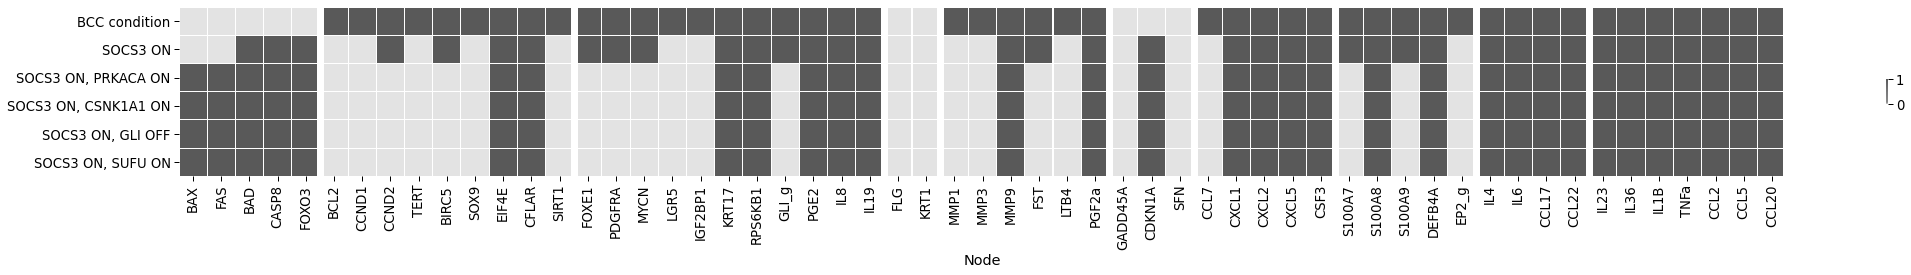

In [39]:
#Making heatmap
Mut_heatmap_SOCS3 = [fpoints_inpBCC_df, fpoints_SOCS3_1_mut_df, fpoints_PRKACA_1_SOCS3_1_mut_df, fpoints_SOCS3_1_CSNK1A1_1_mut_df, fpoints_SOCS3_1_GLI_0_mut_df, fpoints_SOCS3_1_SUFU_1_mut_df]
Mut_heatmap_SOCS3_r = pd.concat(Mut_heatmap_SOCS3, keys=["BCC condition", "SOCS3 ON", "SOCS3 ON, PRKACA ON", "SOCS3 ON, CSNK1A1 ON", "SOCS3 ON, GLI OFF", "SOCS3 ON, SUFU ON"])
Mut_heatmap_SOCS3_r.index = Mut_heatmap_SOCS3_r.index.droplevel(1)
Mut_heatmap_SOCS3_r.columns = Mut_heatmap_SOCS3_r.columns.droplevel(0)

fig, ax = plt.subplots(figsize=(36, 46))
sns.set_context("paper", font_scale=1.5)

def NonLinCdict(steps, hexcol_array):
    cdict = {'red': (), 'green': (), 'blue': ()}
    for s, hexcol in zip(steps, hexcol_array):
        rgb = matplotlib.colors.hex2color(hexcol)
        cdict['red'] = cdict['red'] + ((s, rgb[0], rgb[0]),)
        cdict['green'] = cdict['green'] + ((s, rgb[1], rgb[1]),)
        cdict['blue'] = cdict['blue'] + ((s, rgb[2], rgb[2]),)
    return cdict

#fig, ax = plt.subplots(figsize=(36, 46))
sns.set_context("paper", font_scale=1.5)

hc = ['#e3e3e3', '#8a8a8a', '#79797a', '#616163', '#595959']
th = [0, 0.1, 0.5, 0.9, 1]

cdict = NonLinCdict(th, hc)
cm = LinearSegmentedColormap('test', cdict)

f = sns.heatmap(Mut_heatmap_SOCS3_r, cmap = cm, square = True, linewidth=0.1, cbar_kws={"shrink": .01})

ax.axvline(5, 0, 5, linewidth=7, c='white')
ax.axvline(14, 0, 5, linewidth=7, c='white')
ax.axvline(25, 0, 5, linewidth=7, c='white')
ax.axvline(27, 0, 5, linewidth=7, c='white')
ax.axvline(33, 0, 5, linewidth=7, c='white')
ax.axvline(36, 0, 5, linewidth=7, c='white')
ax.axvline(41, 0, 5, linewidth=7, c='white')
ax.axvline(46, 0, 5, linewidth=7, c='white')
ax.axvline(50, 0, 5, linewidth=7, c='white')
ax.axvline(57, 0, 5, linewidth=7, c='white')
f.figure.savefig('drug_simulations.pdf', dpi = 300)

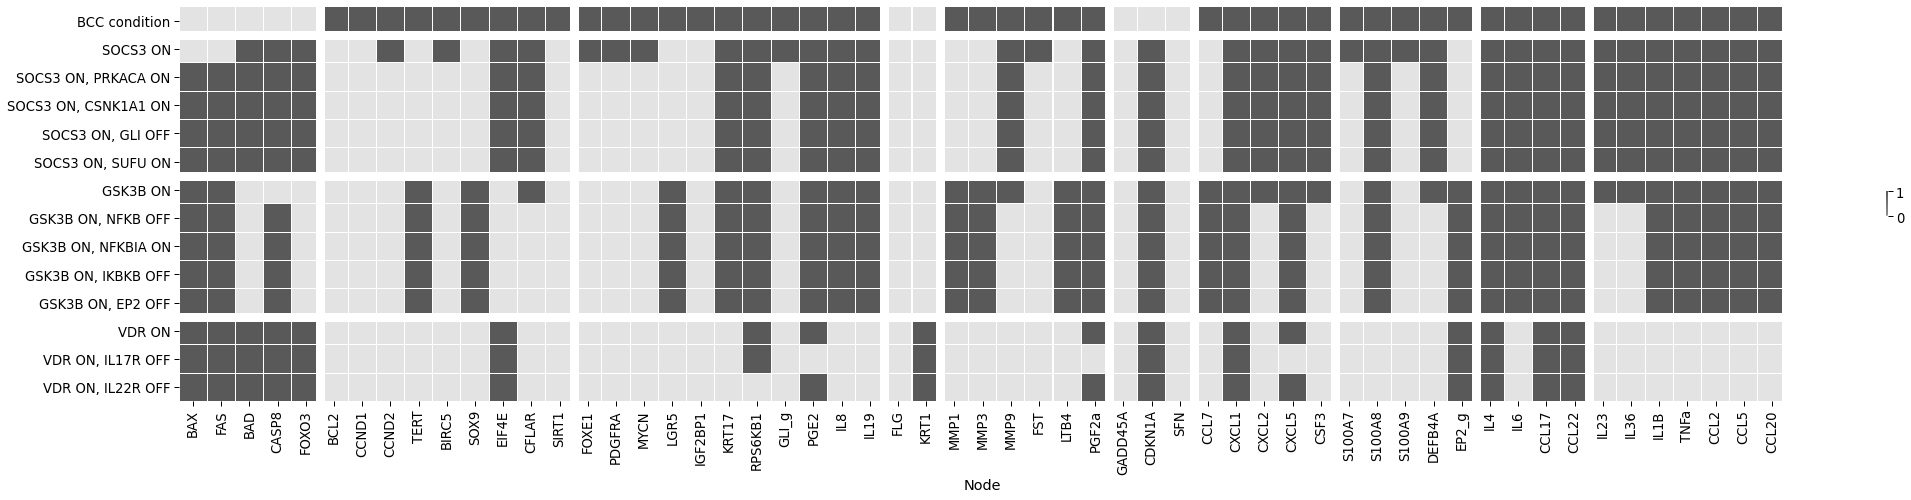

In [40]:
#Making one heatmap, grouped by main mutation
Mut_heatmap_ALL = [fpoints_inpBCC_df, fpoints_SOCS3_1_mut_df, fpoints_PRKACA_1_SOCS3_1_mut_df, fpoints_SOCS3_1_CSNK1A1_1_mut_df, fpoints_SOCS3_1_GLI_0_mut_df, fpoints_SOCS3_1_SUFU_1_mut_df, fpoints_GSK3B_1_mut_df, fpoints_NFKB_0_GSK3B_1_mut_df, fpoints_NFKBIA_1_GSK3B_1_mut_df, fpoints_IKBKB_0_GSK3B_1_mut_df, fpoints_EP2_0_GSK3B_1_mut_df, fpoints_VDR_1_mut_df, fpoints_IL17R_0_VDR_1_mut_df, fpoints_IL22R_0_VDR_1_mut_df]
Mut_heatmap_ALL_r = pd.concat(Mut_heatmap_ALL, keys=["BCC condition", "SOCS3 ON", "SOCS3 ON, PRKACA ON", "SOCS3 ON, CSNK1A1 ON", "SOCS3 ON, GLI OFF", "SOCS3 ON, SUFU ON", "GSK3B ON", "GSK3B ON, NFKB OFF", "GSK3B ON, NFKBIA ON", "GSK3B ON, IKBKB OFF", "GSK3B ON, EP2 OFF", "VDR ON", "VDR ON, IL17R OFF", "VDR ON, IL22R OFF"])
Mut_heatmap_ALL_r.index = Mut_heatmap_ALL_r.index.droplevel(1)
Mut_heatmap_ALL_r.columns = Mut_heatmap_ALL_r.columns.droplevel(0)

fig, ax = plt.subplots(figsize=(36, 46))
sns.set_context("paper", font_scale=1.5)

def NonLinCdict(steps, hexcol_array):
    cdict = {'red': (), 'green': (), 'blue': ()}
    for s, hexcol in zip(steps, hexcol_array):
        rgb = matplotlib.colors.hex2color(hexcol)
        cdict['red'] = cdict['red'] + ((s, rgb[0], rgb[0]),)
        cdict['green'] = cdict['green'] + ((s, rgb[1], rgb[1]),)
        cdict['blue'] = cdict['blue'] + ((s, rgb[2], rgb[2]),)
    return cdict

#fig, ax = plt.subplots(figsize=(36, 46))
sns.set_context("paper", font_scale=1.5)

hc = ['#e3e3e3', '#8a8a8a', '#79797a', '#616163', '#595959']
th = [0, 0.1, 0.5, 0.9, 1]

cdict = NonLinCdict(th, hc)
cm = LinearSegmentedColormap('test', cdict)

f = sns.heatmap(Mut_heatmap_ALL_r, cmap = cm, square = True, linewidth=0.1, cbar_kws={"shrink": .01})

ax.axvline(5, 0, 5, linewidth=9, c='white')
ax.axvline(14, 0, 5, linewidth=9, c='white')
ax.axvline(25, 0, 5, linewidth=9, c='white')
ax.axvline(27, 0, 5, linewidth=9, c='white')
ax.axvline(33, 0, 5, linewidth=9, c='white')
ax.axvline(36, 0, 5, linewidth=9, c='white')
ax.axvline(41, 0, 5, linewidth=9, c='white')
ax.axvline(46, 0, 5, linewidth=9, c='white')
ax.axvline(50, 0, 5, linewidth=9, c='white')
ax.axvline(57, 0, 5, linewidth=9, c='white')
ax.axhline(1, 0, 5, linewidth=9, c='white')
ax.axhline(6, 0, 5, linewidth=9, c='white')
ax.axhline(11, 0, 5, linewidth=9, c='white')
f.figure.savefig('drug_ALL_simulations_dual_REAL.pdf', dpi = 300)

## 7 Combinations with cPLA2a inhibitors

In [41]:
#cPLA2a inhibitor
cPLA2a_0 = biolqm.perturbation(blqm_mod, "GNAS%0 PTCH1%0 FZD%1 TNFRSF1A%1 IL22R%1 IL17R%1 EP2%0 VDR%0 TP53%0 DNAdam%1 IL6R%1 IL4R%1 cPLA2a%0")

#cPLA2a OFF, VDR ON
cPLA2a_0_VDR_1 = biolqm.perturbation(blqm_mod, "GNAS%0 PTCH1%0 FZD%1 TNFRSF1A%1 IL22R%1 IL17R%1 EP2%0 VDR%1 TP53%0 DNAdam%1 IL6R%1 IL4R%1 cPLA2a%0")

#cPLA2a OFF, SMO/GLI OFF
cPLA2a_0_GLI_0 = biolqm.perturbation(blqm_mod, "GNAS%0 PTCH1%0 FZD%1 TNFRSF1A%1 IL22R%1 IL17R%1 EP2%0 VDR%0 TP53%0 DNAdam%1 IL6R%1 IL4R%1 cPLA2a%0 GLI_f%0")

#cPLA2a OFF, PRKACA ON/Imiquimod addition
cPLA2a_0_PRKACA_1 = biolqm.perturbation(blqm_mod, "GNAS%0 PTCH1%0 FZD%1 TNFRSF1A%1 IL22R%1 IL17R%1 EP2%0 VDR%0 TP53%1 DNAdam%1 IL6R%0 IL4R%0 PRKACA%1 cPLA2a%0")


In [42]:
#Computing stable states
#cPLA2a is knocked out
fpoints_cPLA2a_0_mut = biolqm.fixpoints(cPLA2a_0)
fpoints_cPLA2a_0_mut_df = pd.DataFrame(fpoints_cPLA2a_0_mut)
fpoints_cPLA2a_0_mut_df = fpoints_cPLA2a_0_mut_df[marker_nodes]
fpoints_cPLA2a_0_mut_df.columns = pd.MultiIndex.from_arrays(phenotype, names=['Phenotype', 'Node'])

#cPLA2a is knocked out and VDR is turned on
fpoints_cPLA2a_0_VDR_1_mut = biolqm.fixpoints(cPLA2a_0_VDR_1)
fpoints_cPLA2a_0_VDR_1_mut_df = pd.DataFrame(fpoints_cPLA2a_0_VDR_1_mut)
fpoints_cPLA2a_0_VDR_1_mut_df = fpoints_cPLA2a_0_VDR_1_mut_df[marker_nodes]
fpoints_cPLA2a_0_VDR_1_mut_df.columns = pd.MultiIndex.from_arrays(phenotype, names=['Phenotype', 'Node'])

#cPLA2a is knocked out and GLI/SMO knocked off
fpoints_cPLA2a_0_GLI_0_mut = biolqm.fixpoints(cPLA2a_0_GLI_0)
fpoints_cPLA2a_0_GLI_0_mut_df = pd.DataFrame(fpoints_cPLA2a_0_GLI_0_mut)
fpoints_cPLA2a_0_GLI_0_mut_df = fpoints_cPLA2a_0_GLI_0_mut_df[marker_nodes]
fpoints_cPLA2a_0_GLI_0_mut_df.columns = pd.MultiIndex.from_arrays(phenotype, names=['Phenotype', 'Node'])

#cPLA2a is knocked out and PRKACA knocked on
fpoints_cPLA2a_0_PRKACA_1_mut = biolqm.fixpoints(cPLA2a_0_PRKACA_1)
fpoints_cPLA2a_0_PRKACA_1_mut_df = pd.DataFrame(fpoints_cPLA2a_0_PRKACA_1_mut)
fpoints_cPLA2a_0_PRKACA_1_mut_df = fpoints_cPLA2a_0_PRKACA_1_mut_df[marker_nodes]
fpoints_cPLA2a_0_PRKACA_1_mut_df.columns = pd.MultiIndex.from_arrays(phenotype, names=['Phenotype', 'Node'])

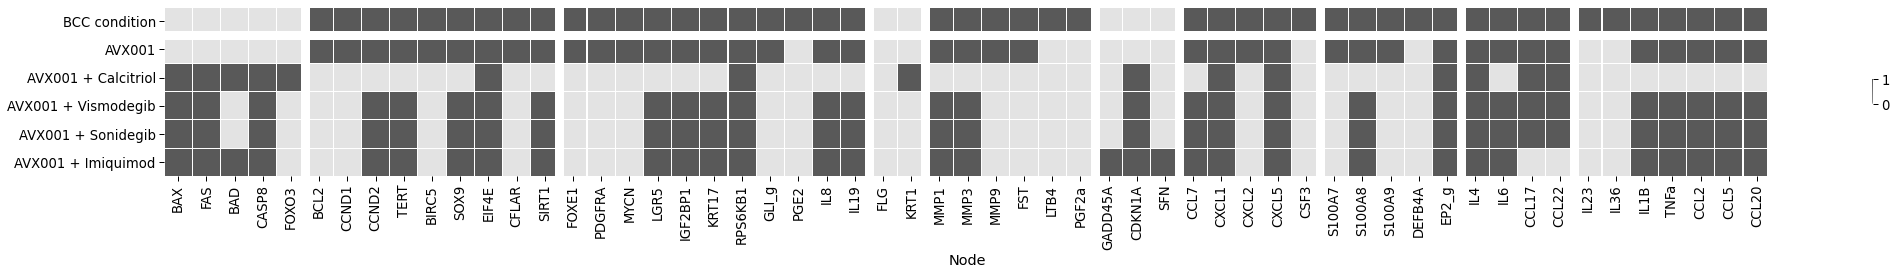

In [43]:
#Making heatmap
Mut_heatmap_cPLA2a = [fpoints_inpBCC_df, fpoints_cPLA2a_0_mut_df, fpoints_cPLA2a_0_VDR_1_mut_df, fpoints_cPLA2a_0_GLI_0_mut_df, fpoints_cPLA2a_0_GLI_0_mut_df, fpoints_cPLA2a_0_PRKACA_1_mut_df]
Mut_heatmap_cPLA2a_r = pd.concat(Mut_heatmap_cPLA2a, keys=["BCC condition", "AVX001", "AVX001 + Calcitriol", "AVX001 + Vismodegib", "AVX001 + Sonidegib", "AVX001 + Imiquimod"])
Mut_heatmap_cPLA2a_r.index = Mut_heatmap_cPLA2a_r.index.droplevel(1)
Mut_heatmap_cPLA2a_r.columns = Mut_heatmap_cPLA2a_r.columns.droplevel(0)

fig, ax = plt.subplots(figsize=(36, 46))
sns.set_context("paper", font_scale=1.5)

def NonLinCdict(steps, hexcol_array):
    cdict = {'red': (), 'green': (), 'blue': ()}
    for s, hexcol in zip(steps, hexcol_array):
        rgb = matplotlib.colors.hex2color(hexcol)
        cdict['red'] = cdict['red'] + ((s, rgb[0], rgb[0]),)
        cdict['green'] = cdict['green'] + ((s, rgb[1], rgb[1]),)
        cdict['blue'] = cdict['blue'] + ((s, rgb[2], rgb[2]),)
    return cdict

#fig, ax = plt.subplots(figsize=(36, 46))
sns.set_context("paper", font_scale=1.5)

hc = ['#e3e3e3', '#8a8a8a', '#79797a', '#616163', '#595959']
th = [0, 0.1, 0.5, 0.9, 1]

cdict = NonLinCdict(th, hc)
cm = LinearSegmentedColormap('test', cdict)

f = sns.heatmap(Mut_heatmap_cPLA2a_r, cmap = cm, square = True, linewidth=0.1, cbar_kws={"shrink": .01})

ax.axvline(5, 0, 5, linewidth=9, c='white')
ax.axvline(14, 0, 5, linewidth=9, c='white')
ax.axvline(25, 0, 5, linewidth=9, c='white')
ax.axvline(27, 0, 5, linewidth=9, c='white')
ax.axvline(33, 0, 5, linewidth=9, c='white')
ax.axvline(36, 0, 5, linewidth=9, c='white')
ax.axvline(41, 0, 5, linewidth=9, c='white')
ax.axvline(46, 0, 5, linewidth=9, c='white')
ax.axvline(50, 0, 5, linewidth=9, c='white')
ax.axvline(57, 0, 5, linewidth=9, c='white')
ax.axhline(1, 0, 5, linewidth=9, c='white')

f.figure.savefig('drug_simulations_cPLA2_REAL.pdf', dpi = 300)

## 8 MaBoSS analysis 

MaBoSS simulation for cancer phenotype markers in the basal cell carcinoma state


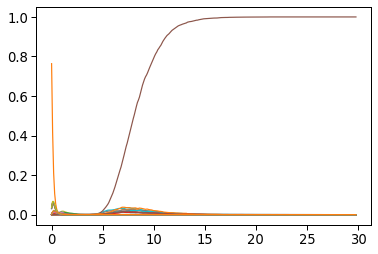

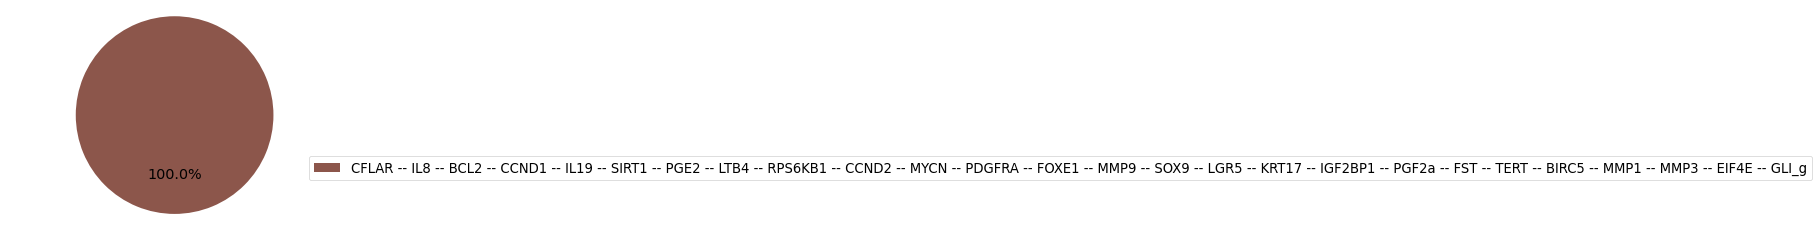

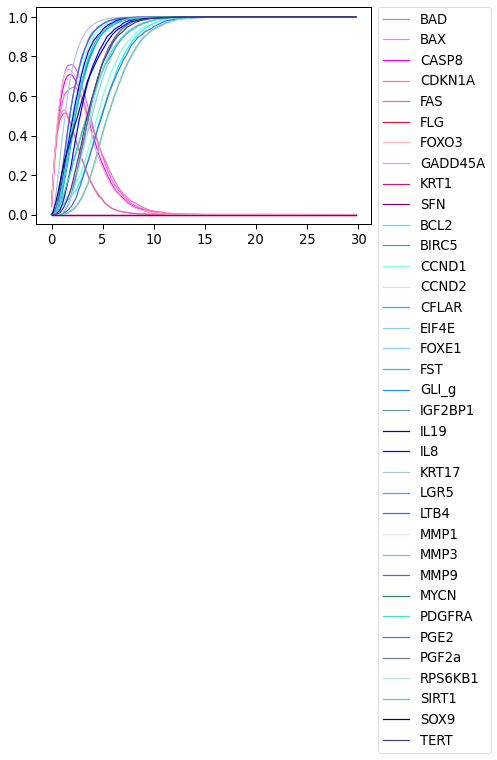

In [44]:
#MaBoSS for all of the cancer markers
# initials
maboss_BCC =  ginsim.to_maboss(gsim_mod)
maboss_BCC.network.set_istate("FZD", [0, 1])
maboss_BCC.network.set_istate("TNFRSF1A", [0, 1])
maboss_BCC.network.set_istate("IL22R", [0, 1])
maboss_BCC.network.set_istate("IL17R", [0, 1])
maboss_BCC.network.set_istate("EP2", [0, 1])
maboss_BCC.network.set_istate("IL6R", [0, 1])
maboss_BCC.network.set_istate("IL4R", [0, 1])
maboss_BCC.network.set_istate("DNAdam", [0, 1])

#Set the mutations
maboss_BCC.mutate("PTCH1", "OFF")
maboss_BCC.mutate("GNAS", "OFF")
maboss_BCC.mutate("TP53", "OFF")
maboss_BCC.mutate("VDR", "OFF")

#parameters and final nodes
maboss_BCC.update_parameters(sample_count=3000,time_tick=0.1, max_time=30)
Cancer_markers = ['BAX', 'FAS', 'BAD', 'CASP8', 'FOXO3', 'BCL2', 'CCND1',  'CCND2', 'TERT', 'BIRC5', 'SOX9', 'EIF4E', 'CFLAR', 'SIRT1', 'FOXE1', 'PDGFRA', 'MYCN', 'LGR5', 'IGF2BP1', 'KRT17', 'RPS6KB1', 'GLI_g', 'PGE2', 'IL8', 'IL19', 'FLG', 'KRT1', 'MMP1', 'MMP3', 'MMP9', 'FST', 'LTB4', 'PGF2a', 'GADD45A', 'CDKN1A', 'SFN']
Apo_Arr_Diff = ['BAX', 'FAS', 'BAD', 'CASP8', 'FOXO3', 'FLG', 'KRT1', 'GADD45A', 'CDKN1A', 'SFN']
maboss.set_output(maboss_BCC, Cancer_markers)

res_BCC_Cancer = maboss_BCC.run()
print("MaBoSS simulation for cancer phenotype markers in the basal cell carcinoma state")
res_BCC_Cancer.plot_trajectory(legend = False)
res_BCC_Cancer.plot_piechart()
#Choosing defined colors to separate cancer prom and prev phenotype
new_color = ['orchid','violet','cyan','lightseagreen','magenta','aquamarine', 'paleturquoise', 'hotpink','deepskyblue','skyblue','palevioletred', 'crimson', 'lightskyblue','lightpink' ,'darkturquoise','plum','dodgerblue','cadetblue','mediumblue','blue','mediumvioletred','lightsteelblue','cornflowerblue','royalblue','lavender','mediumaquamarine','slateblue','seagreen','turquoise','steelblue','slategrey','powderblue','purple','mediumturquoise','darkblue','darkslateblue']
BCC_figure = res_BCC_Cancer.get_nodes_probtraj().plot(legend=True, color = new_color)
#Ordering the genes after color
handles,labels = BCC_figure.get_legend_handles_labels()
order = [0,1,4,7,10,11,13,15,20,32,2,3,5,6,8,9,12,14,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,33,34,35]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], bbox_to_anchor=(1.00,1.03), loc="upper left")
BCC_figure.figure.savefig('MaBoSS_BCC_condidition_REAL.pdf', dpi = 300)


## 9 MaBoSS with pehotype nodes

The remaining codes of this notebook, meaning section 9 with subsections, are taken from:

The article with notebook:
Montagud A, Béal J, Tobalina L, Traynard P, Subramanian V, Szalai B, Alföldi R, Puskás L, Valencia A, Barillot E, Saez-Rodriguez J. Patient-specific Boolean models of signalling networks guide personalised treatments. Elife. 2022 Feb 15;11:e72626.

The notebook used for the code in this section: https://github.com/ArnauMontagud/PROFILE_v2/blob/main/Manuscript%20supplementary%20files/Supplementary%20File%202%20Jupyter%20notebook%20to%20analyse%20Montagud2022_Prostate_Cancer.ipynb




### 9.1 Load the BCC model with phenotype nodes 

In [45]:
BCC_mod_WT = ginsim.load("BCC_phenotypes.zginml")
ginsim.show(BCC_mod_WT)

In [46]:
BCC_blqm = ginsim.to_biolqm(BCC_mod_WT)

# fixpoints
BCC_fpoints = biolqm.fixpoints(BCC_blqm)
print(len(BCC_fpoints), "fixpoints")

948 fixpoints


### 9.2 Simulations in MaBoSS 

In [47]:
BCC_mss = biolqm.to_maboss(BCC_blqm)
BCC_mss.update_parameters(sample_count=5000,max_time=40, time_tick=0.5, thread_count=6)

In [48]:
# Random
for n in BCC_mss.network:
    BCC_mss.network.set_istate(n,[0.5,0.5])
    
BCC_WT_inp = BCC_mss.copy()

In [49]:
# Outputs
BCC_WT_inp.network.set_output(('Apoptosis', 'Proliferation', 'Survival', 'Differentiation', 'Tissue_remodelling_Angiogenesis', 'Cell_cycle_arrest'))
rBCC_WT_inp = BCC_WT_inp.run()

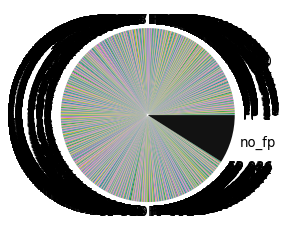

In [50]:
rBCC_WT_inp.plot_fixpoint()

Text(0.5, 1.0, 'WT entropy')

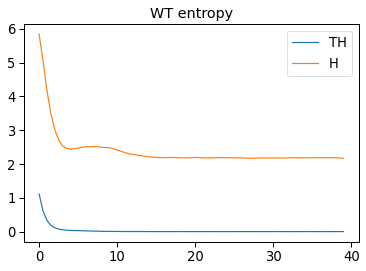

In [51]:
rBCC_WT_inp.plot_entropy_trajectory()
plt.title('WT entropy')

### 9.3 Random start condition

Text(0.5, 1.0, 'BCC wild type')

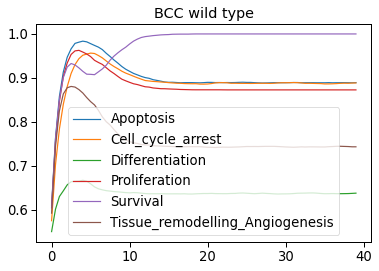

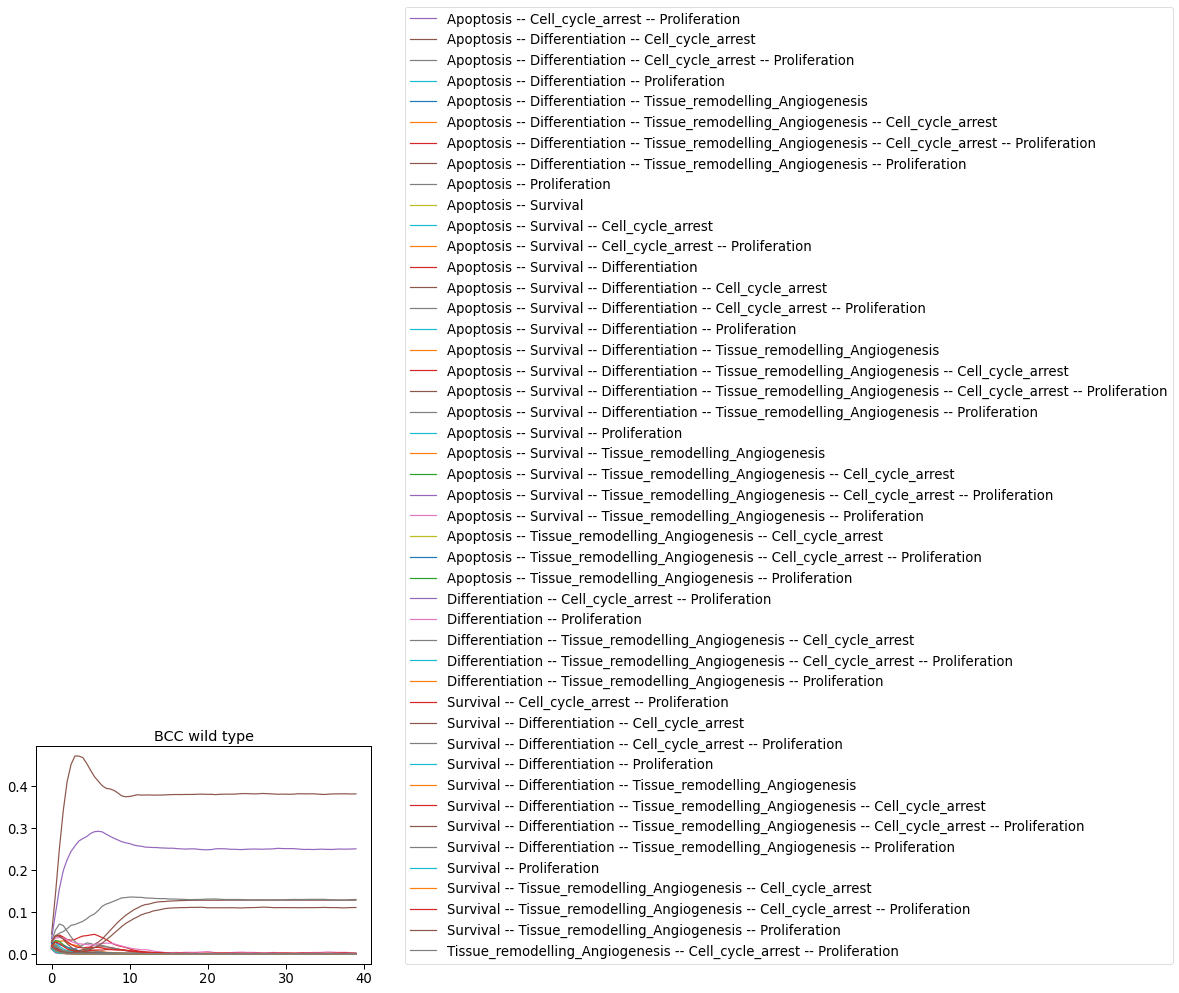

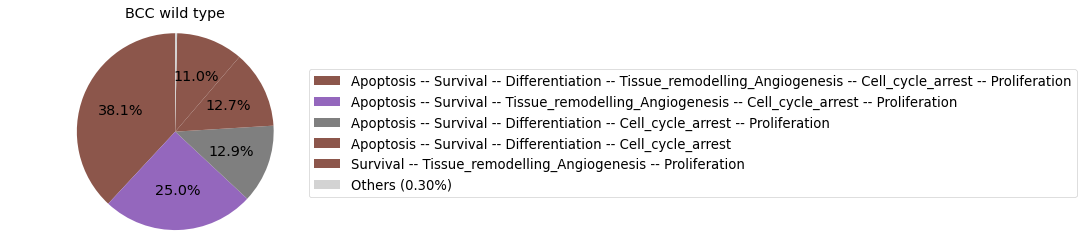

In [52]:
# Making plot
rBCC_WT_inp.get_nodes_probtraj().plot(legend=True)
plt.title('BCC wild type') 

rBCC_WT_inp.plot_trajectory(legend=True)
plt.title('BCC wild type')

# Making pie chart
rBCC_WT_inp.plot_piechart()
plt.title('BCC wild type')


### 9.4 Input starting from zero

In [53]:
# random, but initial conditions zero
BCC_WT_inp2 = maboss.copy_and_update_parameters(BCC_WT_inp, {'max_time':40})
for name in "CSNK1A1 FZD TNFRSF1A IL22R IL17R EP2 IL6R IL4R DNAdam VDR".split(' '):
    BCC_WT_inp2.network.set_istate(name, [1,0]) 

In [54]:
# Running the specified model
BCC_WT_inp2.network.set_output(('Apoptosis', 'Proliferation', 'Survival', 'Differentiation', 'Tissue_remodelling_Angiogenesis', 'Cell_cycle_arrest'))
rBCC_WT_inp2 = BCC_WT_inp2.run()

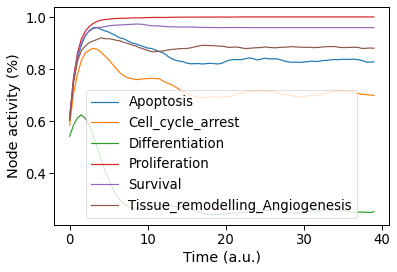

In [55]:
figBCC = rBCC_WT_inp2.get_nodes_probtraj().plot(legend=True)
plt.xlabel("Time (a.u.)")
plt.ylabel("Node activity (%)")
figBCC
plt.savefig("INPUT_OFF.pdf", bbox_inches = 'tight')